In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import itertools
import time
from sklearn.feature_extraction import text
from sklearn import cross_validation 
from sklearn import decomposition
from sklearn import neighbors
from sklearn import ensemble
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import grid_search
from sklearn import metrics
from sklearn import naive_bayes
from sklearn import pipeline
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import cluster
from sklearn.kernel_approximation import RBFSampler
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import log_loss
from sklearn.lda import LDA
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import sklearn
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import brewer2mpl
import IPython
import pandas as pd
import scipy.io
import math
import pybrain
import pkg_resources

/usr/local/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [3]:
from pybrain.datasets import ClassificationDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer

#### Python version and python packages used

- Python version is 2.7.8
- sklearn version = 0.16.1
- pybrain version = 0.3
- pandas version = 0.16.2
- scipy version = 0.14.0
- numpy version = 1.9.1
- matplotlib version = 1.4.2
- seaborn version = 0.5.0
- brewer2mpl version = 1.4.1
- IPython version = 3.1.0

#### Check python and python packages version

In [4]:
print("Python version is {}".format(sys.version))
print("sklearn version = {}".format(sklearn.__version__))
print("pybrain version = {}".format(pkg_resources.get_distribution("pybrain").version))
print("pandas version = {}".format(pd.__version__))
print("scipy version = {}".format(scipy.__version__))
print("numpy version = {}".format(numpy.__version__))
print("matplotlib version = {}".format(matplotlib.__version__))
print("seaborn version = {}".format(sns.__version__))
print("brewer2mpl version = {}".format(brewer2mpl.__version__))
print("IPython version = {}".format(IPython.__version__))

Python version is 2.7.11 (default, Jan 22 2016, 08:29:18) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
sklearn version = 0.17.1
pybrain version = 0.3
pandas version = 0.15.1
scipy version = 0.17.0
numpy version = 1.11.0
matplotlib version = 1.4.2
seaborn version = 0.5.0
brewer2mpl version = 1.4.1
IPython version = 3.1.0


### Dataset Information

#### Dataset souce is from CrowdFlower,  Data For Everyone Library, <a href="http://www.crowdflower.com/data-for-everyone">Apple Computers Twitter sentiment</a>

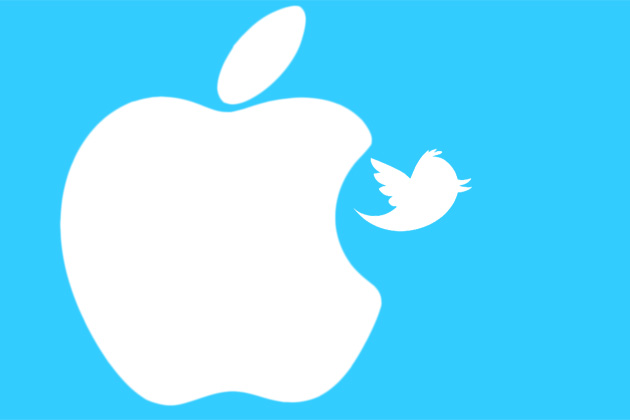

In [5]:
from IPython.display import Image
Image(filename="Apple_Twitter.jpg")

A look into the sentiment around Apple, based on tweets containing #AAPL, @apple, etc.

Contributors were given a tweet and asked whether the user was positive, negative, or neutral about Apple. (They were also allowed to mark "the tweet is not about the company Apple, Inc.)

Tweets cover a wide array of topics including stock performance, new products, IP lawsuits, customer service at Apple stores, etc.

Note: Data containing need neurtal sentiments have been removed to make the dataset a binary classification dataset

Train dataset has 2500 rows and Test Dataset has 650 rows.

#### Load Train Set

In [6]:
df = pd.read_csv('Apple_Twitter_Sentiment_Train.csv', index_col=0)
df.head()

text  sentiment
1953  hey how about you guys make a charger that las...          0
1301  apple fibonacci levels intraday update aapl ht...          1
89     aapl did carl icahn cause a new private equit...          1
3362  strikes me as somewhat stupid that have sent m...          0
80     aapl beacons hit stores ahead of holidays htt...          1

In [7]:
X1 = df['text']
y = df['sentiment']
print X1.shape
print y.shape

(2500,)
(2500,)


#### Create a World Cloud from Train Set Tweets

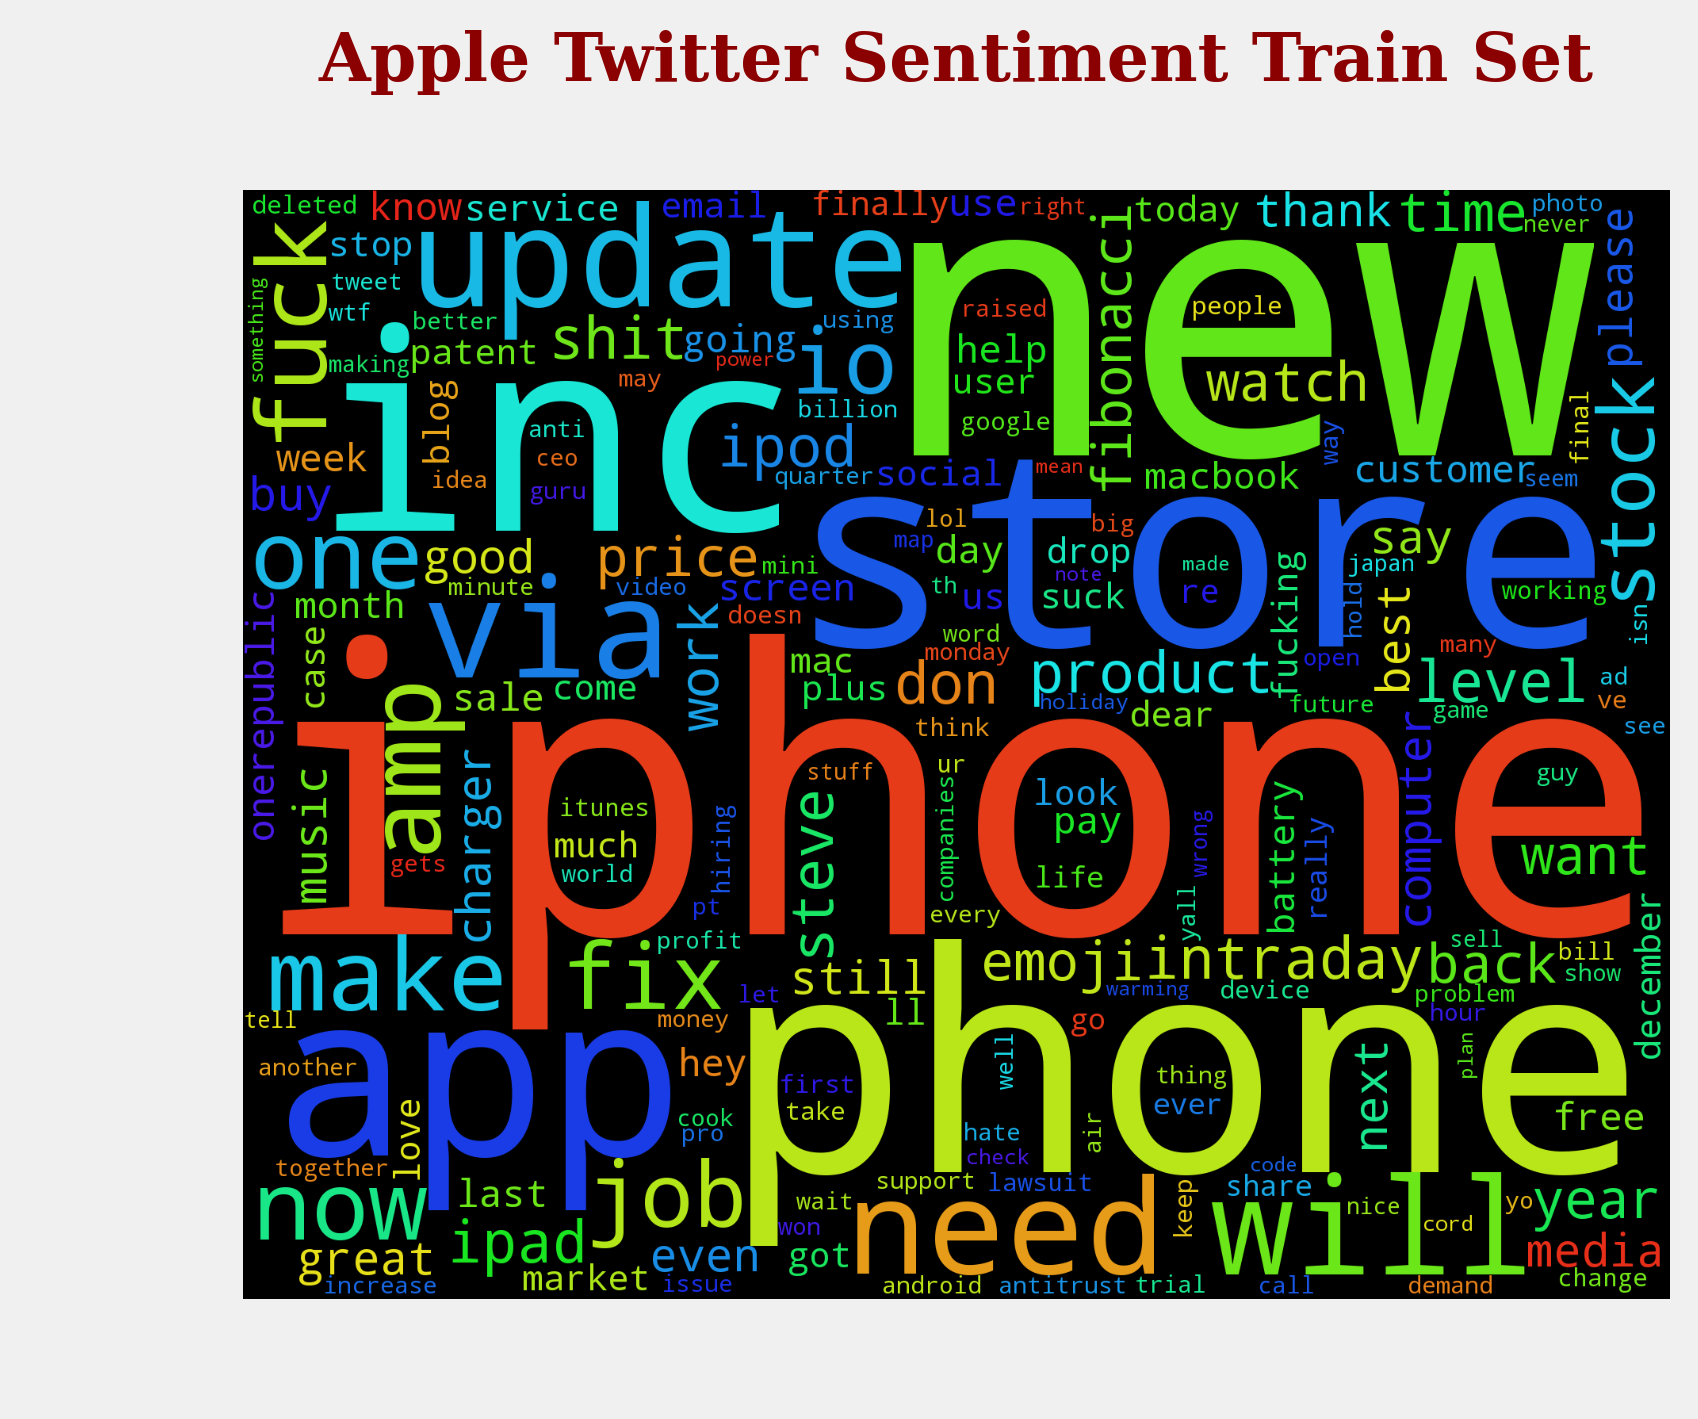

In [8]:
Image(filename="Apple_Twitter_Train_WordCloud.png")

#### Load Test Set

In [9]:
df_t = pd.read_csv('Apple_Twitter_Sentiment_Test.csv')
df_t.head()

Unnamed: 0                                               text  sentiment
0        1567  at all not you gotta be kidding me http t co f...          1
1        1135   venturebeat first to own digital lang ip is n...          1
2         378         alzaabi i wish i could man i wish i could           1
3        2241  jmp securities apple inc is going to to sell h...          1
4         207   google surpasses in u s sales http t co dgebb...          1

In [10]:
Xt1 = df_t['text']
yt = df_t['sentiment']
print Xt1.shape
print yt.shape

(650,)
(650,)


#### Create a World Cloud from Test Set Tweets

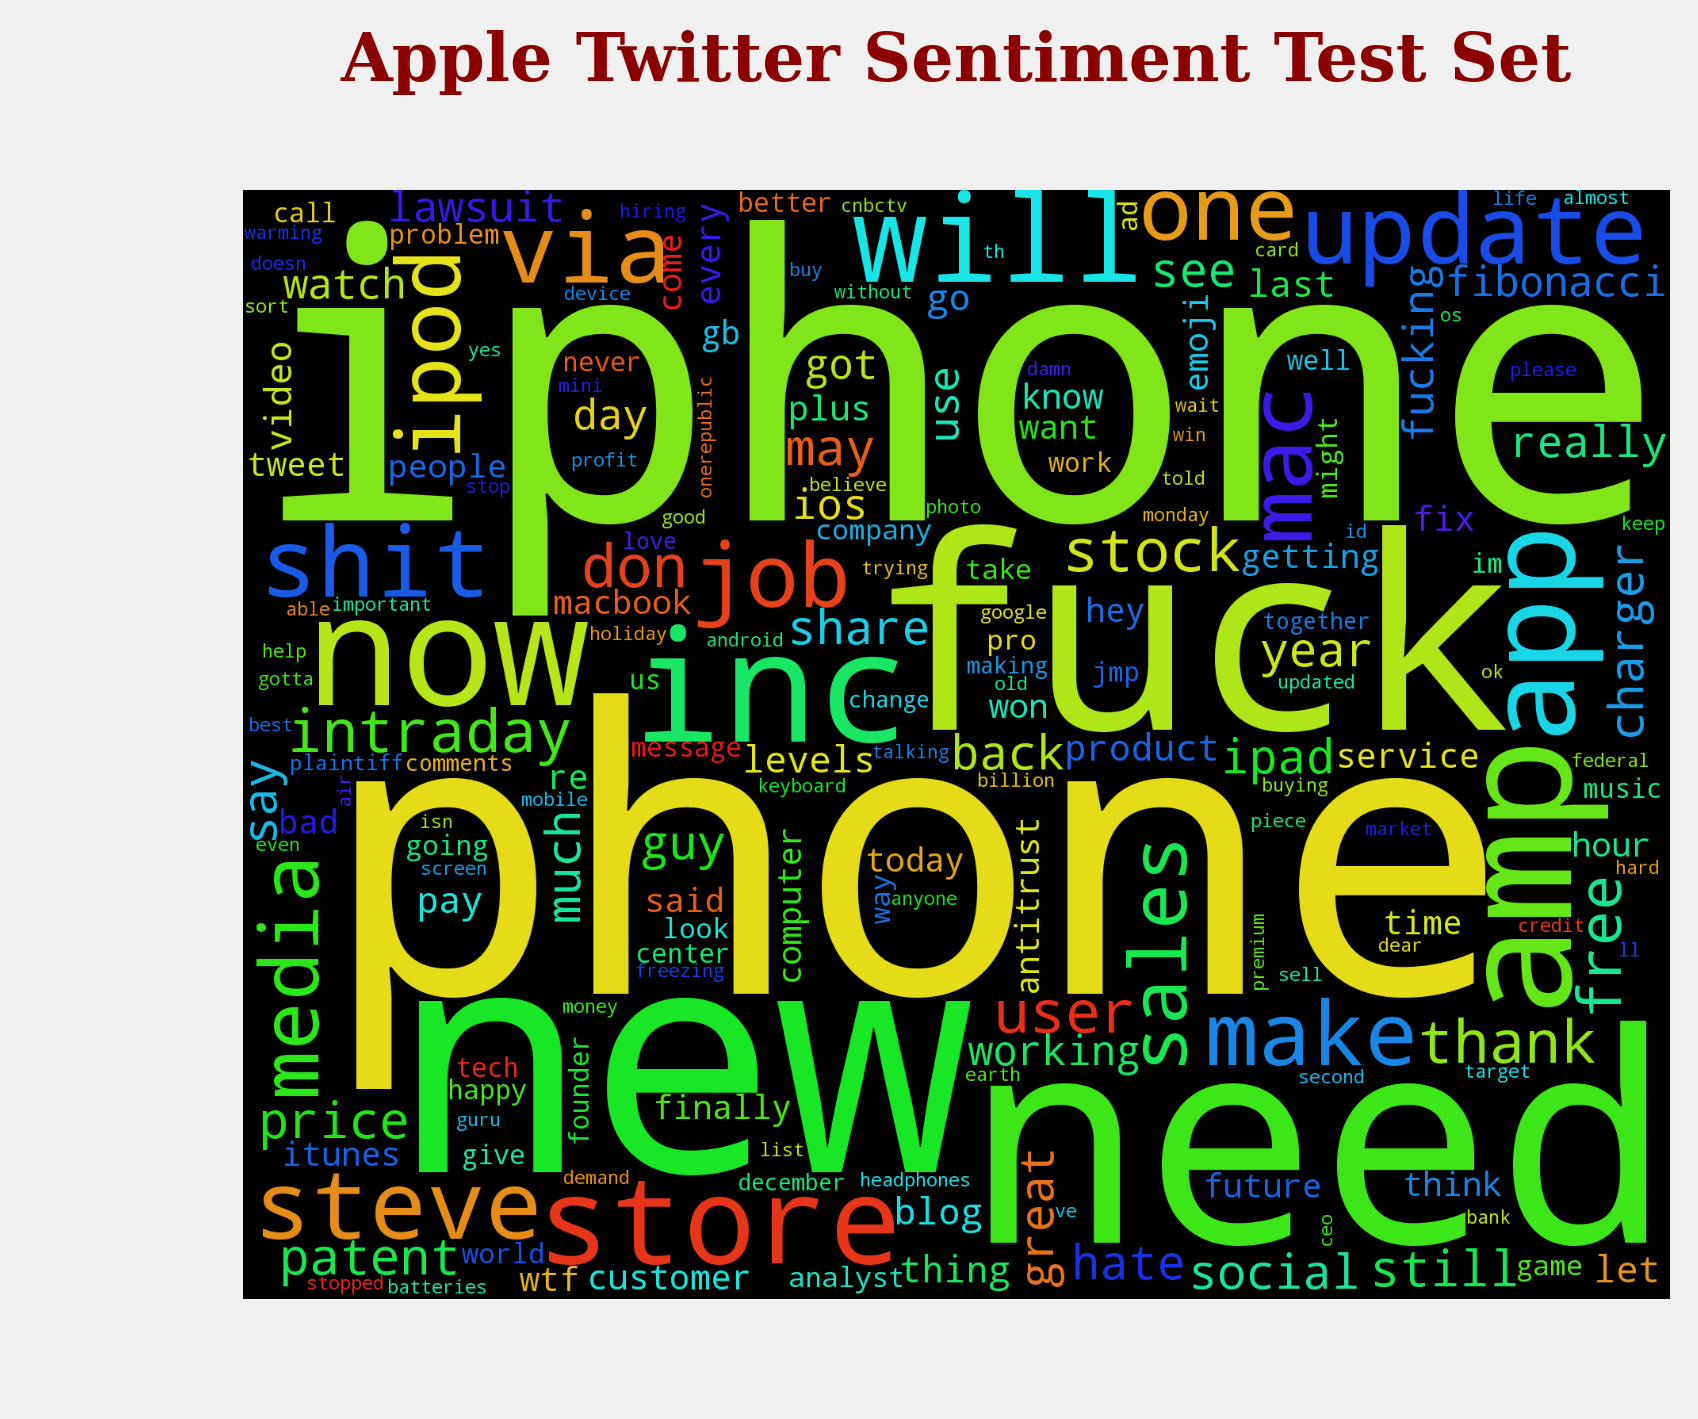

In [11]:
Image(filename="Apple_Twitter_Test_WordCloud.png")

Comparing the word clouds of train and test dataset, it's clear that the top words are very different, making the test dataset a good candidate for testing. 

### Pre-Processing 

#### Feature extraction

- min_df=5, discard words appearing in less than 5 documents
- max_df=0.8, discard words appearing in more than 80% of the documents
- sublinear_tf=True, use sublinear weighting
- use_idf=True, enable IDF
- n-gram=(1,3), sequence of words from 1 to 3 are used to improve sentiment prediction.

In [12]:
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             ngram_range = (1,3),
                             sublinear_tf=True,
                             stop_words='english',
                             use_idf=True)
X = vectorizer.fit_transform(X1)
Xt = vectorizer.transform(Xt1)
print X.shape
print Xt.shape

(2500, 894)
(650, 894)


In [13]:
vectorizer.vocabulary_.get('great')

354

#### Set Matplotlib Parameters

In [14]:
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'bold',
        'size'   : 16,
        }
    
plt.rc('font',family='serif')
plt.rc('font', size=16)
plt.rc('font', weight='bold')
plt.style.use('fivethirtyeight')
    
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 6 and height to 6
fig_size[0] = 6
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

#### Get total rows of each sentiment 

In [15]:
df2 = pd.unique(df['sentiment'].values)
print "Total number of unique sentiment = ", df2.shape
print "="*66
print "Sentiment:\n"
print df2
df2 = df[['sentiment']]
byCandidate = df2.groupby('sentiment').describe()
print "="*66
print "Totals by sentiment:\n"
print byCandidate

Total number of unique sentiment =  (2,)
Sentiment:

[0 1]
Totals by sentiment:

Empty DataFrame
Columns: []
Index: []


In [16]:
bad , good = sum(df2.loc[:, 'sentiment'] == 0), sum(df2.loc[:, 'sentiment'] == 1)
print(bad , good)

(875, 1625)


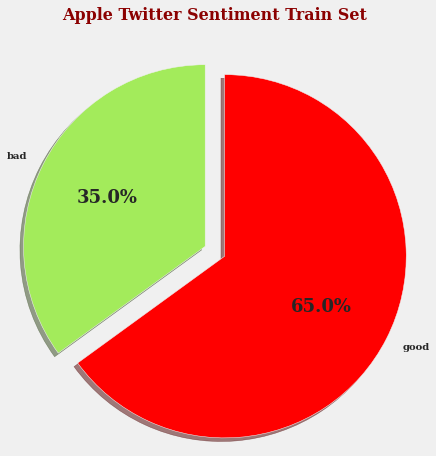

In [17]:
from matplotlib import rcParams
rcParams['font.size'] = 18
blue = '#5A6FFA'
green = '#A3EB5B'
red = '#FF0000'

piechart = plt.pie(
    (bad , good),
    labels=('bad', 'good'),
    shadow=True,
    colors=(green, red),
    explode=(0.06,0.06), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal')   
plt.tight_layout()
plt.title("Apple Twitter Sentiment Train Set", y=1.08,fontdict=font)
plt.savefig("ATS_Sentiment_Train.png", bbox_inches='tight')
plt.show()

In [18]:
df3 = pd.unique(df_t['sentiment'].values)
print "Total number of unique sentiment = ", df3.shape
print "="*66
print "Sentiment:\n"
print df3
df3 = df_t[['sentiment']]
byCandidate = df3.groupby('sentiment').describe()
print "="*66
print "Totals by sentiment:\n"
print byCandidate

Total number of unique sentiment =  (2,)
Sentiment:

[1 0]
Totals by sentiment:

Empty DataFrame
Columns: []
Index: []


In [19]:
bad , good = sum(df3.loc[:, 'sentiment'] == 0), sum(df3.loc[:, 'sentiment'] == 1)
print(bad , good)

(227, 423)


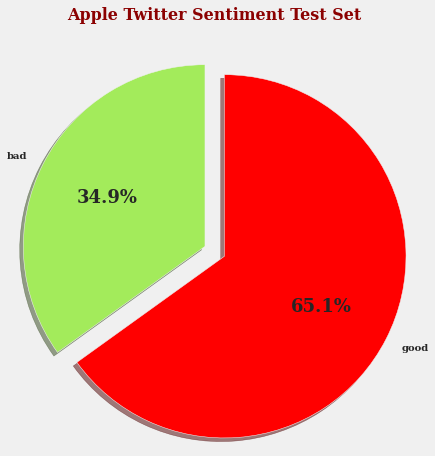

In [20]:
from matplotlib import rcParams
rcParams['font.size'] = 18
blue = '#5A6FFA'
green = '#A3EB5B'
red = '#FF0000'

piechart = plt.pie(
    (bad , good),
    labels=('bad', 'good'),
    shadow=True,
    colors=(green, red),
    explode=(0.06,0.06), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentages
)

plt.axis('equal')   
plt.tight_layout()
plt.title("Apple Twitter Sentiment Test Set", y=1.08,fontdict=font)
plt.savefig("ATS_Sentiment_Test.png", bbox_inches='tight')
plt.show()

### Model Selection

In [21]:
def models(clf, title, name):
    start = time.time()
    print clf
    print ""
    # fit the model
    #clf.fit(X_train, y_train, sample_weight=sample_weight)
    clf.fit(X_train, y_train)
    # make predictions
    clf.predict(X_test)
    # summarize the fit of the model
    score = clf.score(X_train, y_train)
    print "Classification score using train set: {}\n".format(str(score))
    score = clf.score(X_test, y_test)
    print "Classification score using test set: {}\n".format(str(score))
    print"="*66
    print ""
    expected = y
    predicted = clf.predict(X)
    # print confusion matrix
    cm = metrics.confusion_matrix(expected, predicted)
    target_names = ['bad', 'good']
    fig, ax = plt.subplots()
    sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
    title = "Apple Tweets Training Dataset - " + title
    ax.set_title(title, y=1.08, fontdict=font)
    #fig.tight_layout()
    fig.savefig(name, bbox_inches='tight')
    fig.show()
    # train the model with whole training dataset now
    clf.fit(X, y)
    end = time.time()
    total = end-start
    minutes = total//60.0
    seconds = total%60.0
    print "Total running time for this model = {} seconds ({} minutes {} seconds)".format(total, minutes, seconds)
    print ""
    return

In [22]:
def models_test(clf, title, name):
    print clf
    print ""
    # make predictions
    expected = yt
    predicted = clf.predict(Xt)
    # summarize the fit of the model
    score = clf.score(Xt, yt)
    print "Classification score using test set: {}\n".format(str(score))
    print"="*66
    print ""
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print"="*66
    # print confusion matrix
    cm = metrics.confusion_matrix(expected, predicted)
    target_names = ['bad', 'good']
    fig, ax = plt.subplots()
    sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
    title = "Apple Tweets Test Dataset - " + title
    ax.set_title(title, y=1.08, fontdict=font)
    #fig.tight_layout()
    fig.savefig(name, bbox_inches='tight')
    fig.show()

In [23]:
#compute the rms error
def compute_error(x, y, model):
    yfit = model.predict(x)
    return np.sqrt(np.mean((y - yfit) ** 2))

In [24]:
def plot_learning_curve(estimator, title, name, ylim=None):
    
    train_sizes=np.linspace(.1, 1.0, 20)
    cv=None
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    title = "Apple Tweets Dataset - " + title
    plt.title(title, y=1.08, fontdict=font)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontdict=font)
    plt.ylabel("Score", fontdict=font)
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.plot(train_sizes, train_scores_mean, color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, color="g",
             label="Cross-validation score")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    return 

In [25]:
def plot_learning_curve_NN(trnerr,valerr, limit, title, name):
    title = "Apple Tweets Dataset - " + title
    plt.title(title, y=1.08, fontdict=font)
    plt.xlabel("Number of Epochs", fontdict=font)
    plt.ylabel("Error", fontdict=font)
    plt.grid(True)
    plt.plot(trnerr, color="r", 
             label="Training score")
    plt.plot(valerr, color="g", 
             label="Cross-validation score")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlim(0,limit)
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    return

In [26]:
def plot_learning_curve_ot(model, title, name):
    training_error = []
    test_error = []
    mse = metrics.mean_squared_error
    N_range = np.linspace(15, X_train.shape[0], 20).astype(int)
    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
    
        model.fit(XN, yN)
        training_error.append(mse(model.predict(XN), yN))
        test_error.append(mse(model.predict(X_test), y_test))
      
    plt.plot(N_range, training_error, label='Training', color="r")
    plt.plot(N_range, test_error, label='Test', color="g")
    #plt.plot(N_range, np.ones_like(N_range), ':k')
    title = "Apple Tweets Dataset - " + title
    plt.title(title, y=1.08, fontdict=font)
    plt.xlabel("Training examples", fontdict=font)
    plt.ylabel("Error", fontdict=font)
    plt.ylim(0,1)
    plt.grid(True)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    return 

In [27]:
def plot_roc(model, title, name):
    model.fit(X_train, y_train)
    actuals = y_test
    predictions  = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(actuals, predictions)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    
    actuals_t = yt
    predictions_t  = model.predict(Xt)
    false_positive_rate_t, true_positive_rate_t, thresholds_t = metrics.roc_curve(actuals_t, predictions_t)
    roc_auc_t = metrics.auc(false_positive_rate_t, true_positive_rate_t)

    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, 'r', label='Training = %0.2f'% roc_auc)
    plt.plot(false_positive_rate_t, true_positive_rate_t, 'g', label='Test = %0.2f'% roc_auc_t)
    #plt.fill(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.5, )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontdict=font)
    plt.ylabel('True Positive Rate', fontdict=font)
    title = "Apple Tweets Dataset - " + title
    plt.title(title, fontdict=font)
    plt.legend(loc="lower right", fontsize=20)
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    return roc_auc, roc_auc_t, 

In [28]:
def plot_roc_NN(actuals, predictions, actuals_t, predictions_t, title, name):
    
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(actuals, predictions)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    
    false_positive_rate_t, true_positive_rate_t, thresholds_t = metrics.roc_curve(actuals_t, predictions_t)
    roc_auc_t = metrics.auc(false_positive_rate_t, true_positive_rate_t)


    # Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, 'r', label='Training = %0.2f'% roc_auc)
    plt.plot(false_positive_rate_t, true_positive_rate_t, 'g', label='Test = %0.2f'% roc_auc_t)
    #plt.fill(false_positive_rate, true_positive_rate, facecolor='blue', alpha=0.5, )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontdict=font)
    plt.ylabel('True Positive Rate', fontdict=font)
    title = "Apple Tweets Dataset - " + title
    plt.title(title, y=1.08, fontdict=font)
    #plt.legend(loc="lower right")
    plt.legend(loc="lower right", fontsize=20)
    plt.savefig(name, bbox_inches='tight')
    plt.show()
    return roc_auc, roc_auc_t

#### Convert features from sparse to denser format 

In [29]:
X = X.toarray()
Xt = Xt.toarray()
print X.shape
print y.shape
print Xt.shape
print yt.shape

(2500, 894)
(2500,)
(650, 894)
(650,)


#### Split Train data into Train and Test for Cross Validation

In [30]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)
print X_train.shape
print y_train.shape
sample_weight = np.array([1 if i == 0 else 2 for i in y_train])

(2000, 894)
(2000,)


### Decision Tree Model

#### Decision Tree Model Before Pruning

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using train set: 0.9315


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "



Classification score using test set: 0.746


Total running time for this model = 0.929073095322 seconds (0.0 minutes 0.929073095322 seconds)



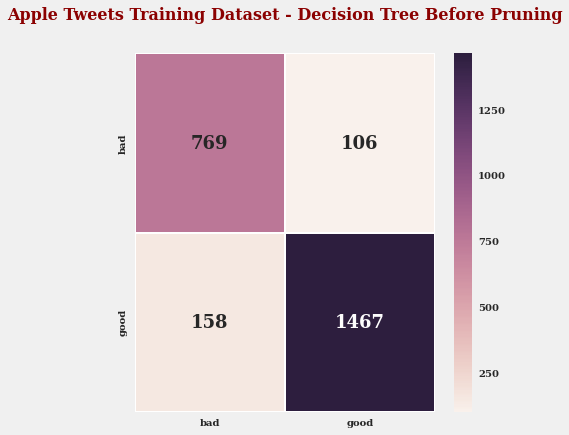

In [31]:
model = tree.DecisionTreeClassifier(criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            random_state=123, splitter='best')
models(model, "Decision Tree Before Pruning", "a_dt_b_cm_train.png") 

#### Decision Tree Model - Test Set ROC & AUC Score Before Pruning

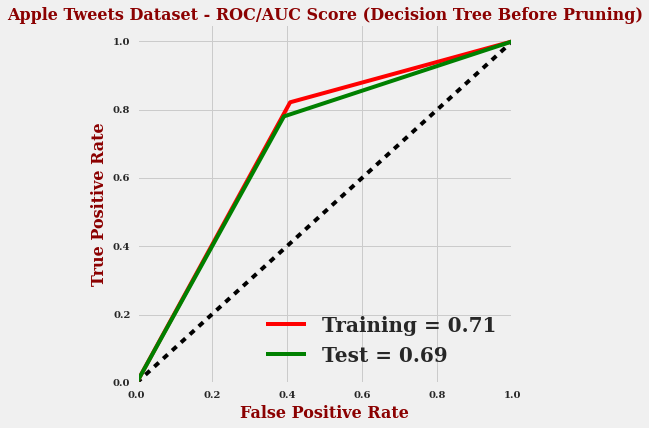

(0.70644599303135891, 0.69403567969506674)

In [32]:
plot_roc(model, "ROC/AUC Score (Decision Tree Before Pruning)", "a_dt_b_roc.png")

#### Decision Tree Model - Learning Curve Before Pruning

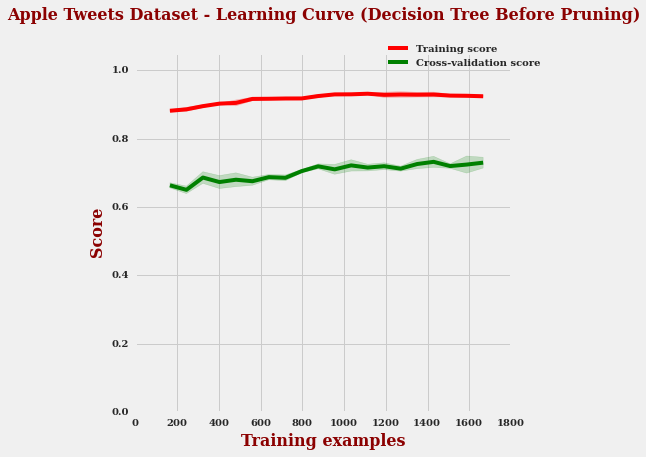

In [33]:
plot_learning_curve(model, "Learning Curve (Decision Tree Before Pruning)", "a_dt_b_lca.png", ylim=(0,1.05))

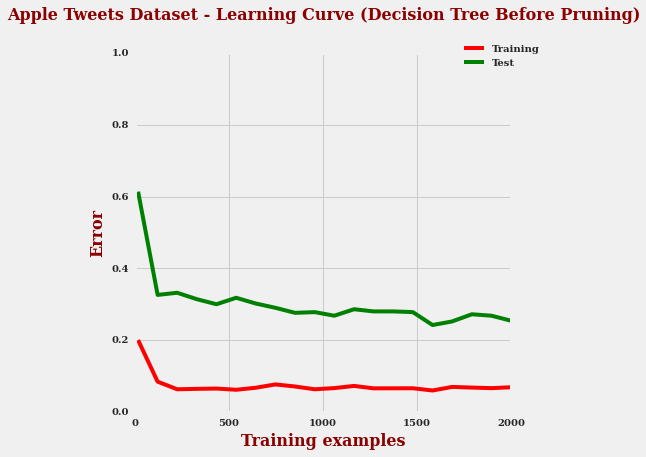

In [34]:
plot_learning_curve_ot(model, "Learning Curve (Decision Tree Before Pruning)", "a_dt_b_lce.png")

#### Decision Tree Model - Test Set Accuracy Before Pruning

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using test set: 0.72


             precision    recall  f1-score   support

          0       0.60      0.61      0.60       227
          1       0.79      0.78      0.78       423

avg / total       0.72      0.72      0.72       650



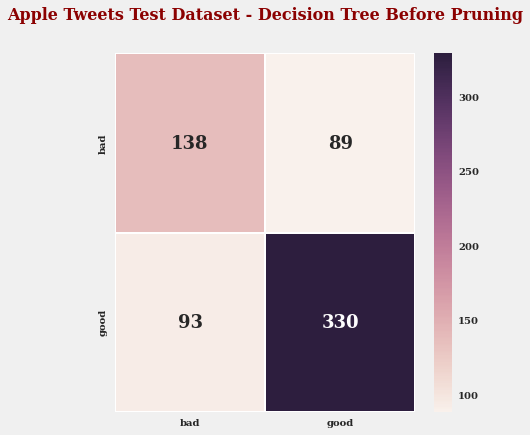

In [35]:
models_test(model, "Decision Tree Before Pruning", "a_dt_b_cm_test.png") 

#### Decision Tree Model - Find Best Accuracy Parameters by Pruning

Decision Tree: 1, Accuracy: 0.740000
Decision Tree: 2, Accuracy: 0.740000
Decision Tree: 3, Accuracy: 0.740000
Decision Tree: 4, Accuracy: 0.740000
Decision Tree: 5, Accuracy: 0.740000
Decision Tree: 6, Accuracy: 0.740000
Decision Tree: 7, Accuracy: 0.740000
Decision Tree: 8, Accuracy: 0.740000
Decision Tree: 9, Accuracy: 0.740000
Decision Tree: 10, Accuracy: 0.740000
Decision Tree: 11, Accuracy: 0.740000
Decision Tree: 12, Accuracy: 0.740000
Decision Tree: 13, Accuracy: 0.748000
Decision Tree: 14, Accuracy: 0.714000
Decision Tree: 15, Accuracy: 0.714000
Decision Tree: 16, Accuracy: 0.714000
Decision Tree: 17, Accuracy: 0.714000
Decision Tree: 18, Accuracy: 0.714000
Decision Tree: 19, Accuracy: 0.714000
Decision Tree: 20, Accuracy: 0.712000
Decision Tree: 21, Accuracy: 0.712000
Decision Tree: 22, Accuracy: 0.740000
Decision Tree: 23, Accuracy: 0.740000


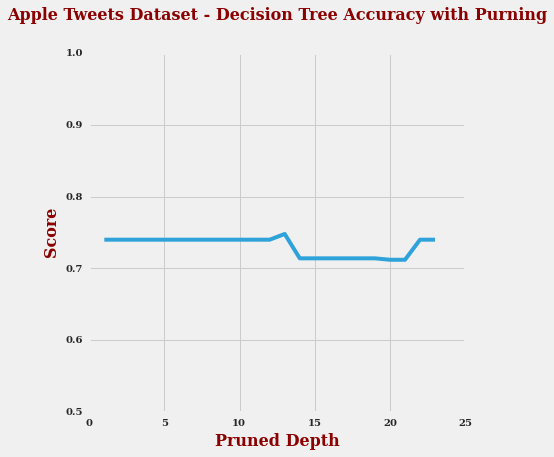

In [36]:
results = []
for n in range(1,24, 1):
    clf = tree.DecisionTreeClassifier( criterion='entropy',
            max_depth=24, max_features="auto", max_leaf_nodes=None,
             min_samples_leaf=6, min_samples_split=n,
            random_state=123, splitter='best')
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))
    print "Decision Tree: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])
plt.plot(results.n, results.accuracy)
plt.ylim([0.5,1])
plt.xlabel('Pruned Depth', fontdict=font)
plt.ylabel('Score', fontdict=font)
plt.title("Apple Tweets Dataset - Decision Tree Accuracy with Purning", y=1.08, fontdict=font)
plt.savefig("a_dt_pruning.png", bbox_inches='tight')
plt.show()

#### Grid Search to find the best pruning parameters

#### Decision Tree Model After Pruning (Depth 40)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using train set: 0.7885

Classification score using test set: 0.77


Total running time for this model = 0.247596025467 seconds (0.0 minutes 0.247596025467 seconds)



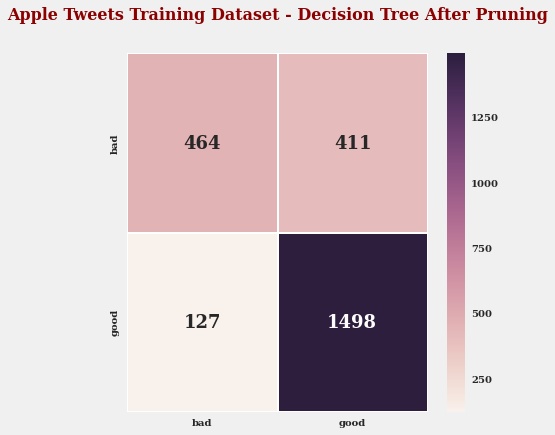

In [37]:
model = tree.DecisionTreeClassifier( criterion='entropy',
            max_depth=40, max_features="auto", max_leaf_nodes=None,
            min_samples_leaf=4, min_samples_split=10,
            random_state=123, splitter='best')
models(model, "Decision Tree After Pruning", "a_dt_a_cm_train.png") 

#### Decision Tree Model - Test Set ROC/AUC Score After Pruning

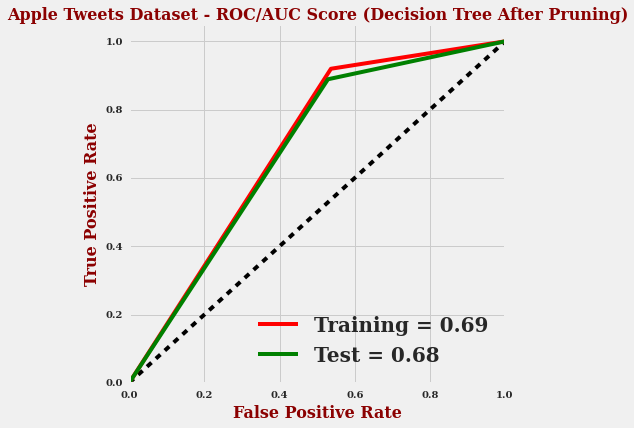

In [38]:
dt_roc, dt_roct = plot_roc(model, "ROC/AUC Score (Decision Tree After Pruning)", "a_dt_a_roc.png")

#### Decision Tree Model - Learning Curve After Pruning

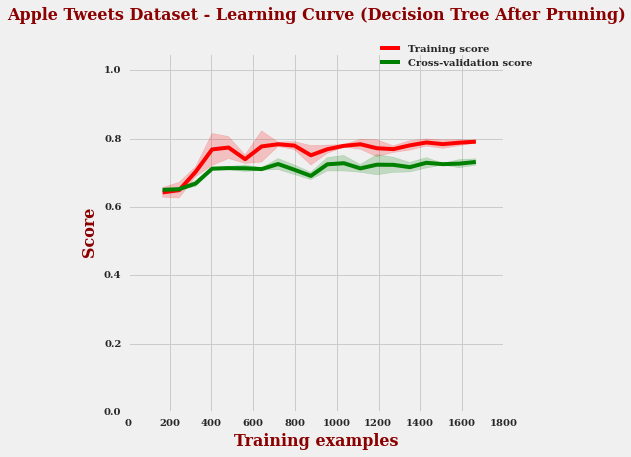

In [39]:
plot_learning_curve(model, "Learning Curve (Decision Tree After Pruning)", "a_dt_a_lca.png", ylim=(0,1.05))

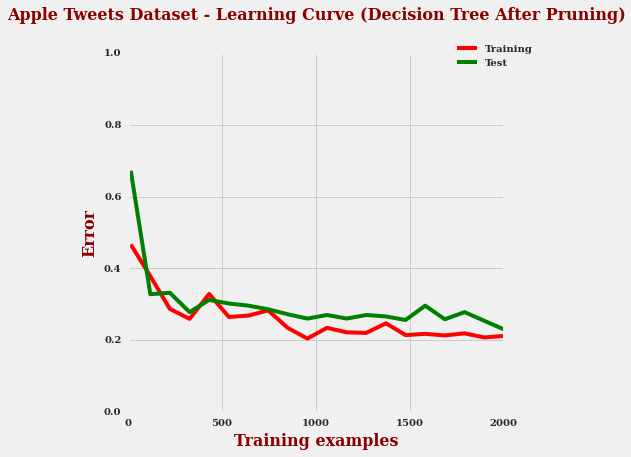

In [40]:
plot_learning_curve_ot(model, "Learning Curve (Decision Tree After Pruning)", "a_dt_a_lce.png")

#### Decision Tree Model - Test Set Accuracy After Pruning

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Classification score using test set: 0.743076923077


             precision    recall  f1-score   support

          0       0.69      0.47      0.56       227
          1       0.76      0.89      0.82       423

avg / total       0.74      0.74      0.73       650



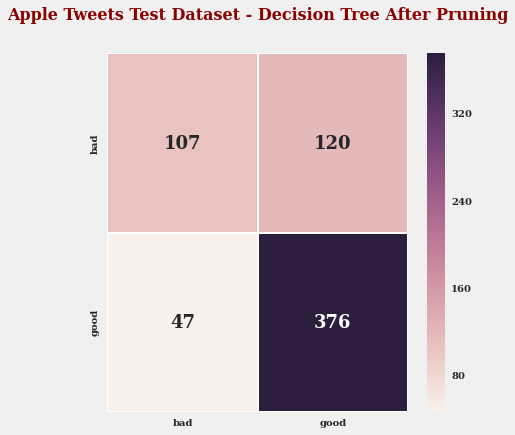

In [41]:
models_test(model, "Decision Tree After Pruning", "a_dt_a_cm_test.png")  

####  Final Decision Tree Model 

In [42]:
dt_train_start = time.time()
model.fit(X,y)
dt_train_end = time.time()
dt_train_time = dt_train_end - dt_train_start
print "Decision Tree Training time in seconds : %3f" % (dt_train_time)
print ""
decisiontree_model = model 
print decisiontree_model
print ""
preds = decisiontree_model.predict(X_test)
#dt_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))

scores = cross_validation.cross_val_score(model, X, y, cv=10)
dt_validation_accuracy = scores.mean()
print "Decision Tree Validation Set Accuracy: %3f" % (dt_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
dt_validation_f1 = scores.mean()
print "Decision Tree Validation Set f1: %3f" % (dt_validation_f1)
print ""

dt_predict_start = time.time()
preds = decisiontree_model.predict(Xt)
dt_predict_end = time.time()
dt_predict_time = dt_predict_end-dt_predict_start
print "Decision Tree Prediction time in seconds : %3f" % (dt_predict_time)
print ""
dt_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "Decision Tree Test Set Accuracy: %3f" % (dt_test_accuracy)
print ""

dt_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "Decision Tree Test Set f1 Score: %3f" % (dt_test_accuracy)
print ""

Decision Tree Training time in seconds : 0.023381

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=4,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

Decision Tree Validation Set Accuracy: 0.739604

Decision Tree Validation Set f1: 0.818588

Decision Tree Prediction time in seconds : 0.001147

Decision Tree Test Set Accuracy: 0.736923

Decision Tree Test Set f1 Score: 0.736923



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### KNN Model

#### KNN Model Decision

- Number of neighbour are tuned to 10 for best accuracy
- Uniform Weights gives better accuracy than Distance Weights. All points in the neighborhood are considered of uniform weight instead of inverse of their distance.
- Uniform Weights were chosen for accuracy but it's slower training time than Distance Weights since it considers all training points. But difference in training time is negibible for this dataset
- Euclidean distance function is used since it gives better accuracy than Manhattan distance. 
- KNN doesn't give much accuracy as other algorithms since there are many features and it tends to overfit - curse of dimensionality.
- The curse of dimernsionality in the dataset affects KNN's performance.

#### KNN Model with Euclidean Distance and 2 Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Classification score using train set: 0.897

Classification score using test set: 0.686


Total running time for this model = 8.90514397621 seconds (0.0 minutes 8.90514397621 seconds)



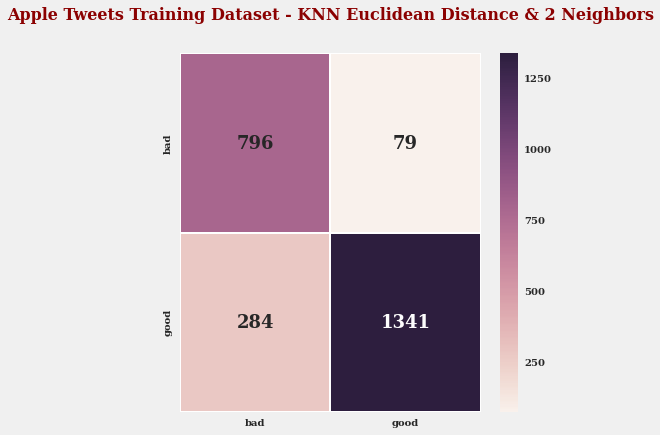

In [43]:
model = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform')
models(model, "KNN Euclidean Distance & 2 Neighbors", "a_knn_b_cm_train.png")  

#### KNN Model - Test Set AUC Score with Euclidean Distance and 2 Neighbors

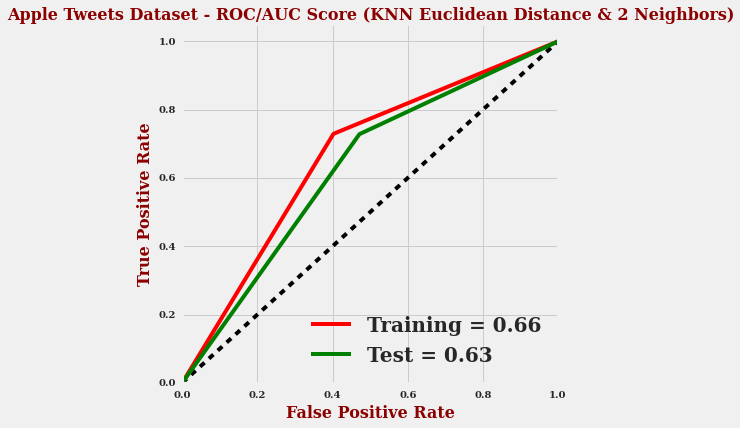

(0.66336382113821135, 0.62838337447016801)

In [44]:
plot_roc(model, "ROC/AUC Score (KNN Euclidean Distance & 2 Neighbors)", "a_knn_b_roc.png")

#### KNN Model - Learning Curve with Euclidean Distance and 2 Neighbors

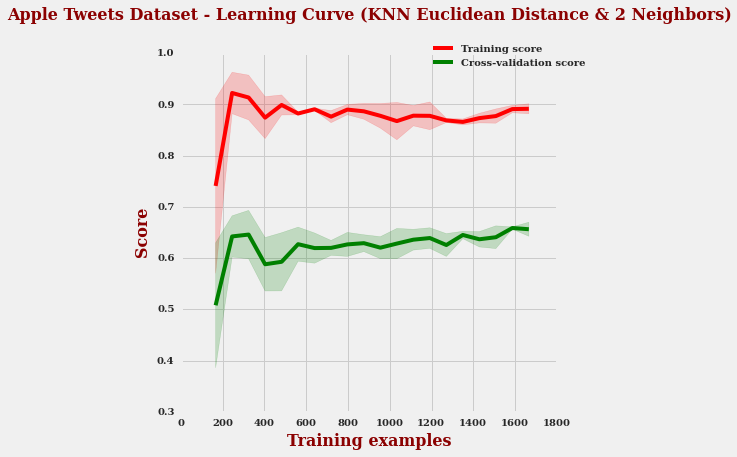

In [45]:
plot_learning_curve(model, "Learning Curve (KNN Euclidean Distance & 2 Neighbors)", "a_knn_b_lca.png", ylim=None)

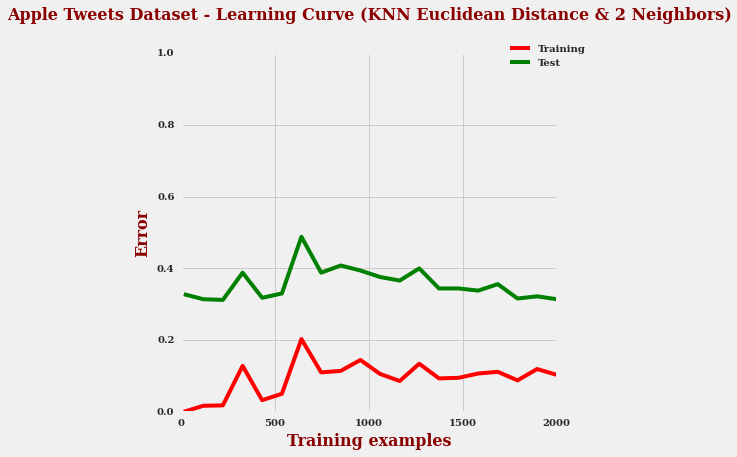

In [46]:
plot_learning_curve_ot(model, "Learning Curve (KNN Euclidean Distance & 2 Neighbors)", "a_knn_b_lce.png")

#### KNN Model - Test Set Accuracy with Euclidean Distance and 2 Neighbours

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Classification score using test set: 0.658461538462


             precision    recall  f1-score   support

          0       0.51      0.53      0.52       227
          1       0.74      0.73      0.74       423

avg / total       0.66      0.66      0.66       650



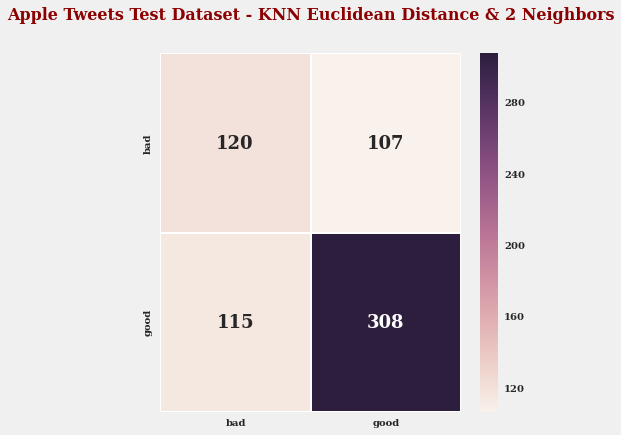

In [47]:
models_test(model, "KNN Euclidean Distance & 2 Neighbors", "a_knn_b_cm_test.png") 

#### KNN Model with Manhattan Distance and 2 Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='uniform')

Classification score using train set: 0.897

Classification score using test set: 0.652


Total running time for this model = 8.26270079613 seconds (0.0 minutes 8.26270079613 seconds)



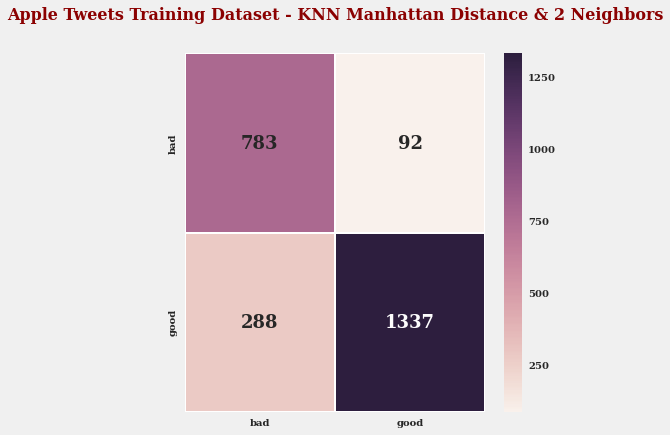

In [48]:
model = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform', p=1)
models(model, "KNN Manhattan Distance & 2 Neighbors", "a_knn_b_cm2_train.png")      

#### KNN Model - Test Set AUC Score with Manhattan Distance and 2 Neighbors

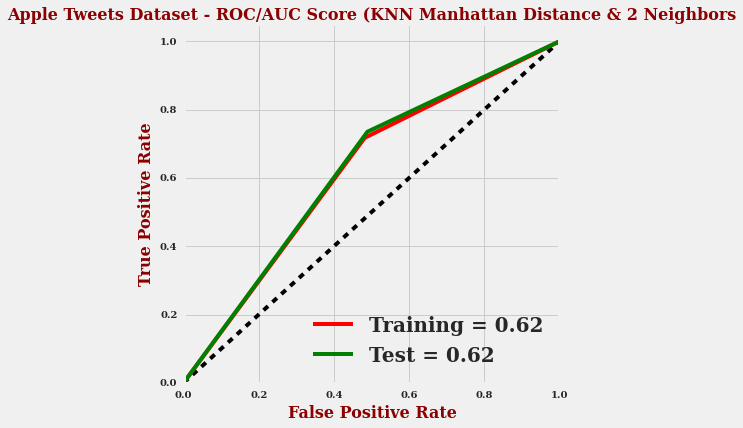

(0.61777729384436708, 0.62311890107372347)

In [49]:
plot_roc(model, "ROC/AUC Score (KNN Manhattan Distance & 2 Neighbors", "a_knn_b2_roc.png")

####  KNN Model - Learning Curve with Manhattan Distance and 2 Neighbors

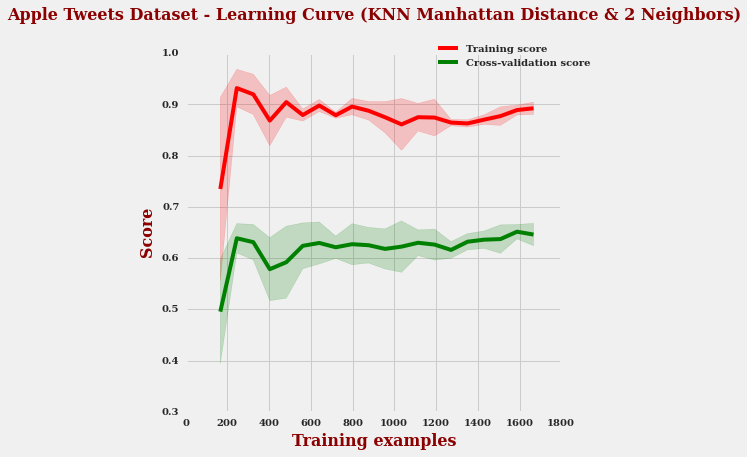

In [50]:
plot_learning_curve(model, "Learning Curve (KNN Manhattan Distance & 2 Neighbors)", "a_knn_b2_lca.png", ylim=None)

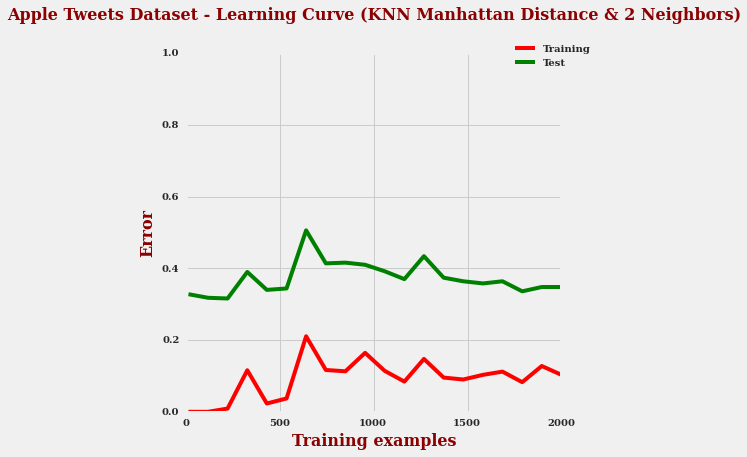

In [51]:
plot_learning_curve_ot(model, "Learning Curve (KNN Manhattan Distance & 2 Neighbors)", "a_knn_b2_lce.png")

#### KNN Model - Test Set Accuracy with Manhattan Distance and 2 Neighbours

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=1,
           weights='uniform')

Classification score using test set: 0.656923076923


             precision    recall  f1-score   support

          0       0.51      0.51      0.51       227
          1       0.74      0.74      0.74       423

avg / total       0.66      0.66      0.66       650



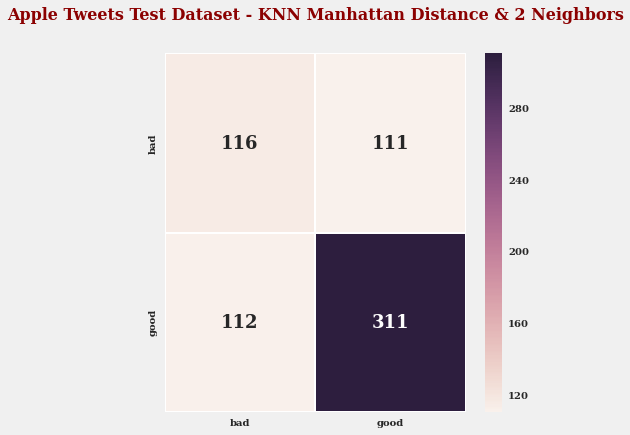

In [52]:
models_test(model, "KNN Manhattan Distance & 2 Neighbors", "a_knn_b2_cm_test.png") 

#### Clearly, KNN Euclidean Distance is are better fit for this dataset than Manhattan

#### KNN Model - Find Best Accuracy Score by Tuning Number of Neigbours

Neighbors: 1, Accuracy: 0.722000
Neighbors: 2, Accuracy: 0.686000
Neighbors: 3, Accuracy: 0.704000
Neighbors: 4, Accuracy: 0.714000
Neighbors: 5, Accuracy: 0.686000
Neighbors: 6, Accuracy: 0.692000
Neighbors: 7, Accuracy: 0.690000
Neighbors: 8, Accuracy: 0.674000
Neighbors: 9, Accuracy: 0.698000
Neighbors: 10, Accuracy: 0.696000
Neighbors: 11, Accuracy: 0.692000
Neighbors: 12, Accuracy: 0.676000
Neighbors: 13, Accuracy: 0.686000
Neighbors: 14, Accuracy: 0.686000
Neighbors: 15, Accuracy: 0.692000
Neighbors: 16, Accuracy: 0.694000
Neighbors: 17, Accuracy: 0.682000
Neighbors: 18, Accuracy: 0.684000
Neighbors: 19, Accuracy: 0.682000
Neighbors: 20, Accuracy: 0.682000
Neighbors: 21, Accuracy: 0.680000
Neighbors: 22, Accuracy: 0.686000
Neighbors: 23, Accuracy: 0.680000
Neighbors: 24, Accuracy: 0.680000
Neighbors: 25, Accuracy: 0.678000
Neighbors: 26, Accuracy: 0.680000
Neighbors: 27, Accuracy: 0.680000
Neighbors: 28, Accuracy: 0.680000
Neighbors: 29, Accuracy: 0.676000
Neighbors: 30, Accuracy

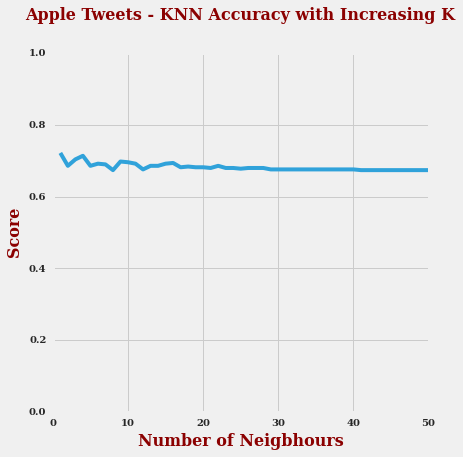

In [53]:
results = []
for n in range(1, 51, 1):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n, weights="uniform", p=2)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))
    print "Neighbors: %d, Accuracy: %3f" % (n, accuracy)

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])
plt.ylim([0,1])
plt.plot(results.n, results.accuracy)
plt.xlabel("Number of Neigbhours", fontdict=font)
plt.ylabel("Score", fontdict=font)
plt.title("Apple Tweets - KNN Accuracy with Increasing K", y=1.08, fontdict=font)
plt.savefig("a_knn_neigbours.png", bbox_inches='tight')
plt.show()

#### Grid search to find the best number of neighbors

#### KNN Model with Euclidean Distance & 3 Neigbhors (after tuning)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Classification score using train set: 0.8075

Classification score using test set: 0.704


Total running time for this model = 9.72266411781 seconds (0.0 minutes 9.72266411781 seconds)



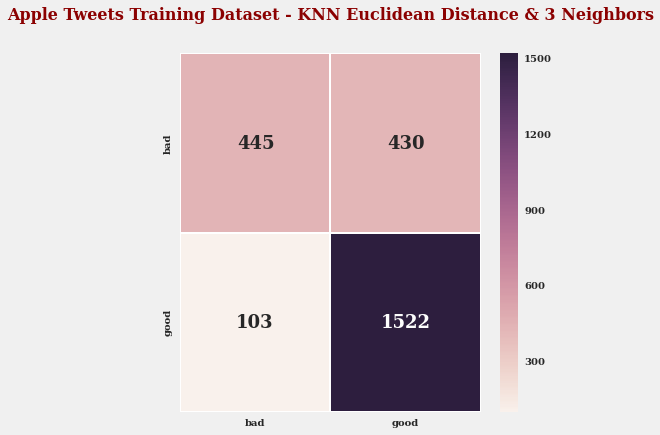

In [54]:
model = neighbors.KNeighborsClassifier(n_neighbors=3, leaf_size=30, weights="uniform", p=2)
models(model, "KNN Euclidean Distance & 3 Neighbors", "a_knn_a_cm_train.png")

#### KNN Model - Test Set AUC Score with Uniform Weights and 3 Neighbours

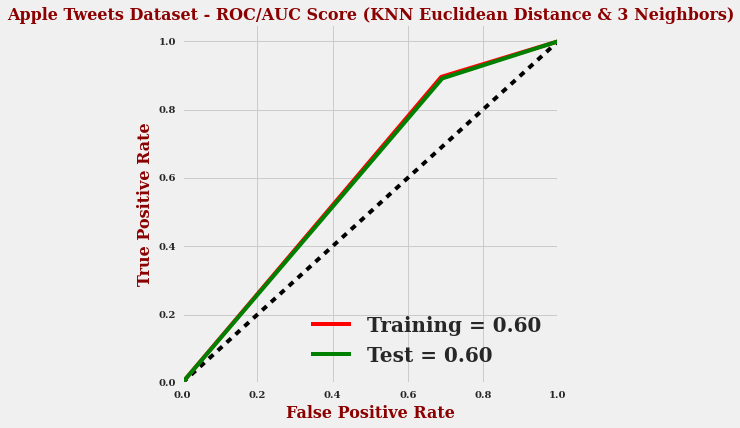

In [55]:
knn_roc, knn_roct = plot_roc(model, "ROC/AUC Score (KNN Euclidean Distance & 3 Neighbors)", "a_knn_a_roc.png")

#### KNN Model - Learning Curve with Uniform Weights and 3 Neighbours

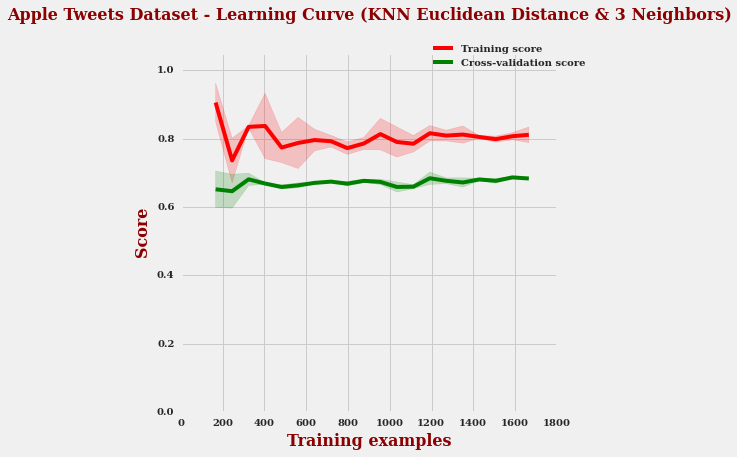

In [56]:
plot_learning_curve(model, "Learning Curve (KNN Euclidean Distance & 3 Neighbors)", "a_knn_a_lca.png", ylim=(0,1.05))

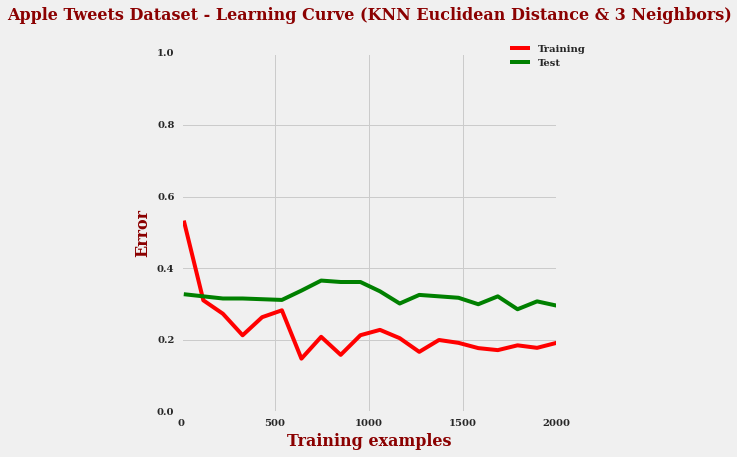

In [57]:
plot_learning_curve_ot(model, "Learning Curve (KNN Euclidean Distance & 3 Neighbors)", "a_knn_a_lce.png")

#### KNN Final Model - Test Set Accuracy with Euclidean Distance & 3 Neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Classification score using test set: 0.687692307692


             precision    recall  f1-score   support

          0       0.60      0.31      0.41       227
          1       0.71      0.89      0.79       423

avg / total       0.67      0.69      0.66       650



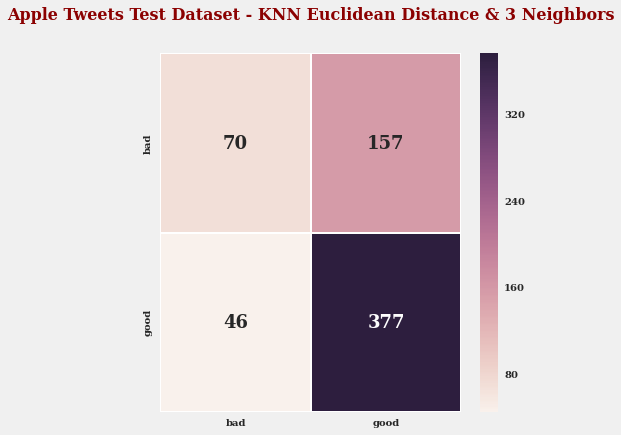

In [58]:
models_test(model, "KNN Euclidean Distance & 3 Neighbors", "a_knn_a_cm_test.png") 

#### Final KNN Model

In [59]:
knn_train_start = time.time()
model.fit(X,y)
knn_train_end = time.time()
knn_train_time = knn_train_end - knn_train_start
print "KNN Training time in seconds : %3f" % (knn_train_time)
print ""
knn_model = model 
print knn_model
print ""
preds = knn_model.predict(X_test)
#knn_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))

scores = cross_validation.cross_val_score(model, X, y, cv=10)
knn_validation_accuracy = scores.mean()
print "KNN Validation Set Accuracy: %3f" % (knn_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
knn_validation_f1 = scores.mean()
print "KNN Validation Set f1: %3f" % (knn_validation_f1)
print ""

knn_predict_start = time.time()
preds = knn_model.predict(Xt)
knn_predict_end = time.time()
knn_predict_time = knn_predict_end-knn_predict_start
print "KNN Prediction time in seconds : %3f" % (knn_predict_time)
print ""

knn_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "KNN Test Set Accuracy: %3f" % (knn_test_accuracy)
print ""

knn_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "KNN Test Set f1 Score: %3f" % (knn_test_f1)
print ""

KNN Training time in seconds : 0.077596

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

KNN Validation Set Accuracy: 0.682803

KNN Validation Set f1: 0.782052

KNN Prediction time in seconds : 1.341281

KNN Test Set Accuracy: 0.703077

KNN Test Set f1 Score: 0.795334



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### Boosting Model

#### AdaBoost Model Before Pruning (Number of Estimators =  50)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=123)

Classification score using train set: 0.987

Classification score using test set: 0.766


Total running time for this model = 99.8466808796 seconds (1.0 minutes 39.8466808796 seconds)



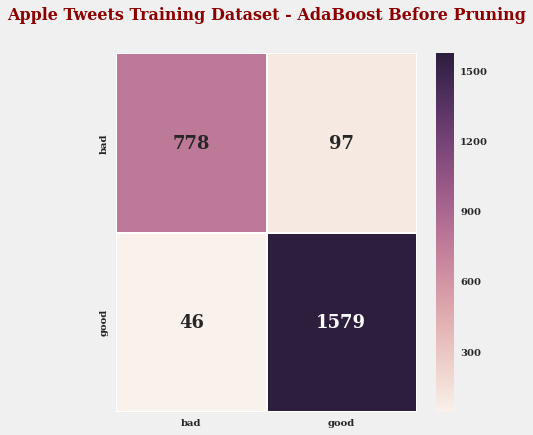

In [60]:
model = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=123, splitter='best'), algorithm='SAMME', n_estimators=50, random_state=123 )
models(model, "AdaBoost Before Pruning", "a_ada_b_cm_train.png")  

####  AdaBoost Model - Test Set ROC/AUC Score Before Pruning

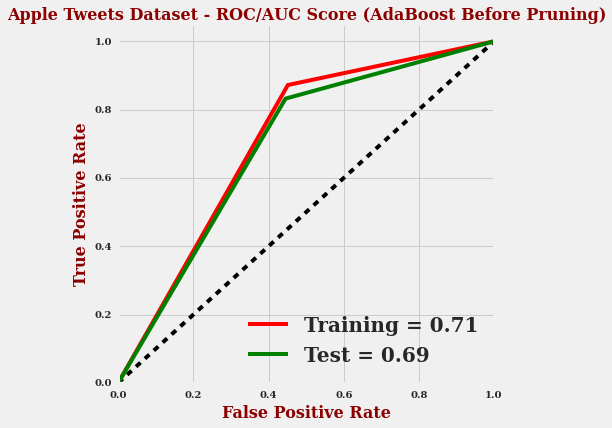

(0.71040214866434392, 0.69360868976578027)

In [61]:
plot_roc(model, "ROC/AUC Score (AdaBoost Before Pruning)", "a_ada_b_roc.png")

####  AdaBoost Model - Learning Curve Before Pruning

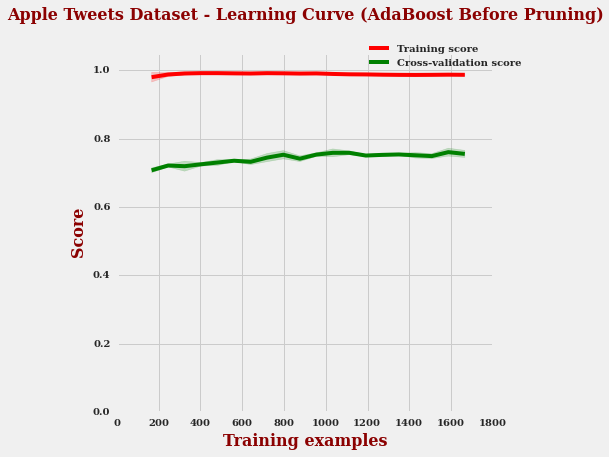

In [62]:
plot_learning_curve(model, "Learning Curve (AdaBoost Before Pruning)", "a_ada_b_lca.png", ylim=(0,1.05))

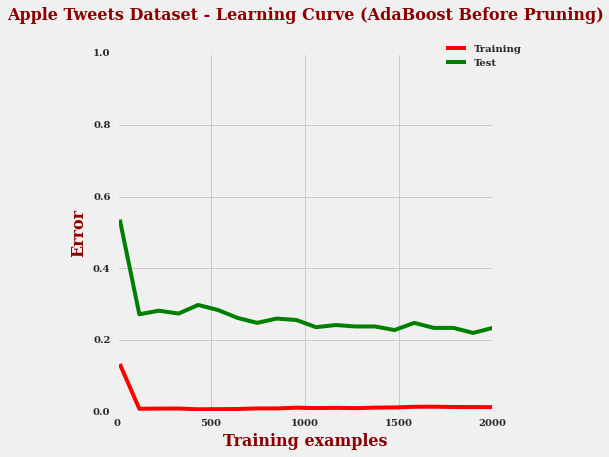

In [63]:
plot_learning_curve_ot(model, "Learning Curve (AdaBoost Before Pruning)", "a_ada_b_lce.png")

####  AdaBoost Model - Test Set Accuracy Before Pruning

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=123)

Classification score using test set: 0.735384615385


             precision    recall  f1-score   support

          0       0.64      0.56      0.59       227
          1       0.78      0.83      0.80       423

avg / total       0.73      0.74      0.73       650



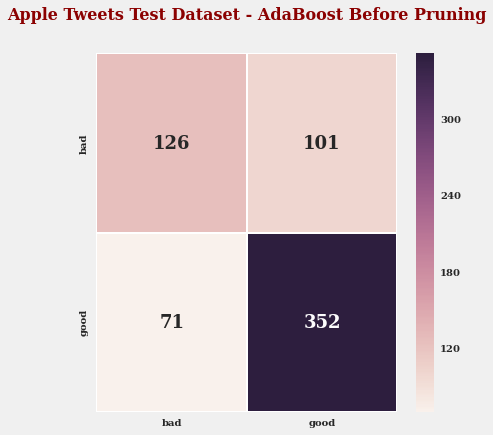

In [64]:
models_test(model, "AdaBoost Before Pruning", "a_ada_b_cm_test.png") 

#### Grid Search to find best accuracy with pruning

#### AdaBoost Model After Pruning

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=123)

Classification score using train set: 0.8215

Classification score using test set: 0.788


Total running time for this model = 14.1238532066 seconds (0.0 minutes 14.1238532066 seconds)



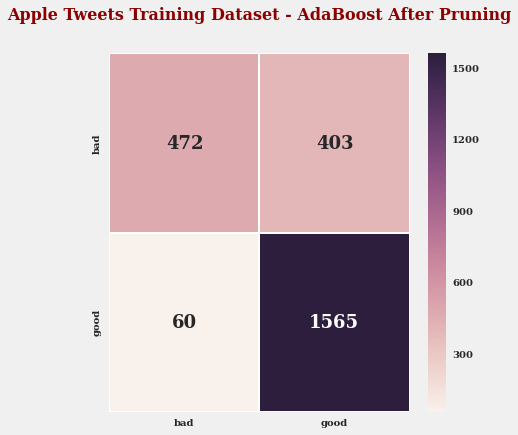

In [65]:
model = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            random_state=123, splitter='best'), algorithm='SAMME', n_estimators=100, random_state=123 )
models(model, "AdaBoost After Pruning", "a_ada_a_cm_train.png") 

#### AdaBoost Model - Test Set ROC/AUC Score After Pruning

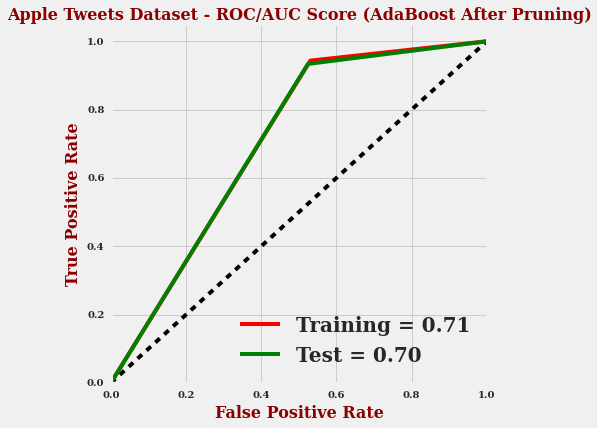

In [66]:
ada_roc, ada_roct = plot_roc(model, "ROC/AUC Score (AdaBoost After Pruning)", "a_ada_a_roc.png")

#### AdaBoost Model - Learning Curve After Pruning

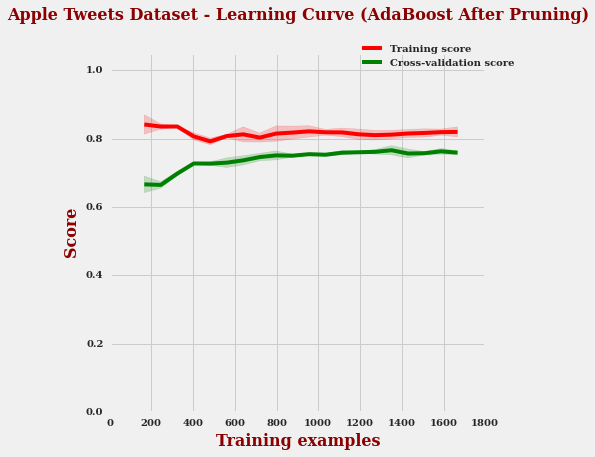

In [67]:
plot_learning_curve(model, "Learning Curve (AdaBoost After Pruning)", "a_ada_a_lca.png", ylim=(0,1.05))

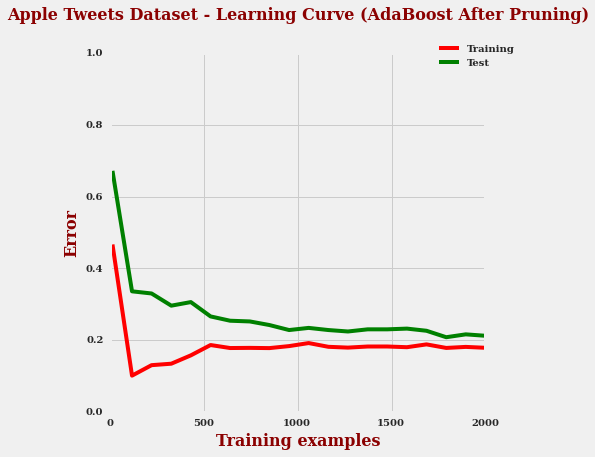

In [68]:
plot_learning_curve_ot(model, "Learning Curve (AdaBoost After Pruning)", "a_ada_a_lce.png")

#### AdaBoost Model - Test Set Accuracy After Pruning

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=123)

Classification score using test set: 0.773846153846


             precision    recall  f1-score   support

          0       0.79      0.48      0.60       227
          1       0.77      0.93      0.84       423

avg / total       0.78      0.77      0.76       650



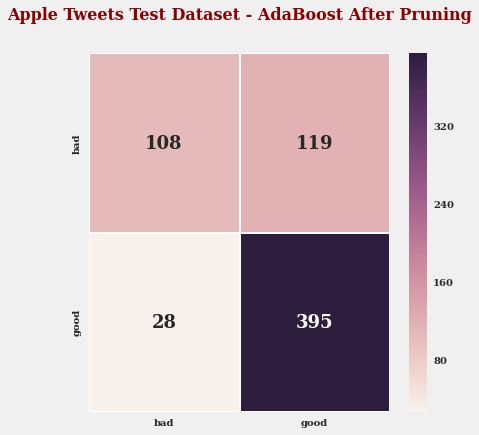

In [69]:
models_test(model, "AdaBoost After Pruning", "a_ada_a_cm_test.png") 

#### Final AdaBoost Model

In [70]:
ada_train_start = time.time()
model.fit(X,y)
ada_train_end = time.time()
ada_train_time = ada_train_end - ada_train_start
print "AdaBoost Training time in seconds : %3f" % (ada_train_time)
print ""
ada_model = model 
print ada_model
print ""
preds = ada_model.predict(X_test)
#ada_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))
scores = cross_validation.cross_val_score(model, X, y, cv=10)
ada_validation_accuracy = scores.mean()
print "AdaBoost Validation Set Accuracy: %3f" % (ada_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
ada_validation_f1 = scores.mean()
print "AdaBoost Validation Set f1: %3f" % (ada_validation_f1)
print ""

ada_predict_start = time.time()
preds = ada_model.predict(Xt)
ada_predict_end = time.time()
ada_predict_time = ada_predict_end-ada_predict_start
print "AdaBoost Prediction time in seconds : %3f" % (ada_predict_time)
print ""

ada_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "AdaBoost Test Set Accuracy: %3f" % (ada_test_accuracy)
print ""

ada_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "AdaBoost Test Set f1 Score: %3f" % (ada_test_f1)
print ""

AdaBoost Training time in seconds : 7.636611

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=9,
            min_samples_split=16, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=123)

AdaBoost Validation Set Accuracy: 0.785963

AdaBoost Validation Set f1: 0.850604

AdaBoost Prediction time in seconds : 0.024435

AdaBoost Test Set Accuracy: 0.763077

AdaBoost Test Set f1 Score: 0.833333



/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:976: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### SVM Model

#### SVM Model Design

- SVM penality parameter C value of 1 gives better accuracy.
- Linear Kernel gives better accuracy than RBF or Poly. Linear kernel gives best performance since this is a linearly seperable dataset.

#### SVM Model Before Tuning (RBF Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

Classification score using train set: 0.6445

Classification score using test set: 0.672


Total running time for this model = 34.7351169586 seconds (0.0 minutes 34.7351169586 seconds)



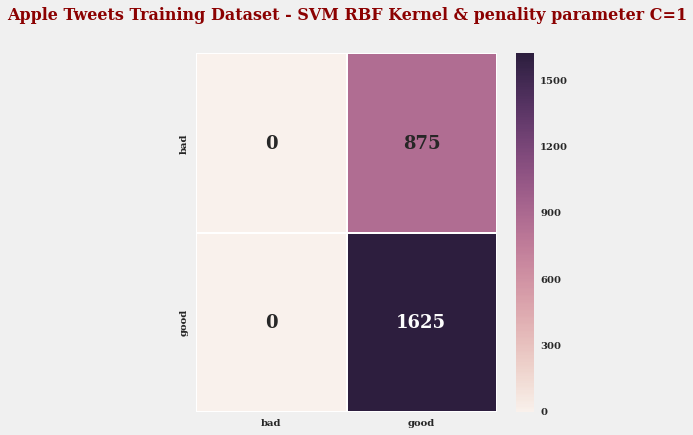

In [72]:
model = svm.SVC(probability=True, random_state=123)
models(model, "SVM RBF Kernel & penality parameter C=1", "a_svm_b_cm_train.png")   

#### SVM Model - Train Set ROC/AUC Score Before Tuning (RBF Kernel & C=1.0)

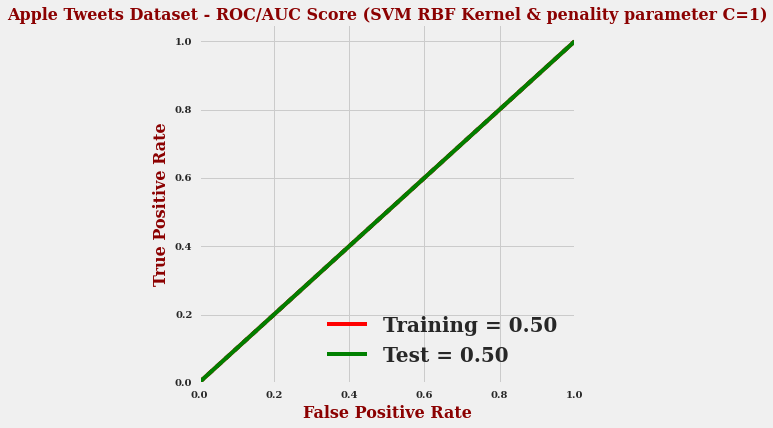

(0.5, 0.5)

In [73]:
plot_roc(model, "ROC/AUC Score (SVM RBF Kernel & penality parameter C=1)", "a_svm_b_roc.png")

#### SVM Model - Learning Curve Before Tuning (RBF Kernel & C=1.0)

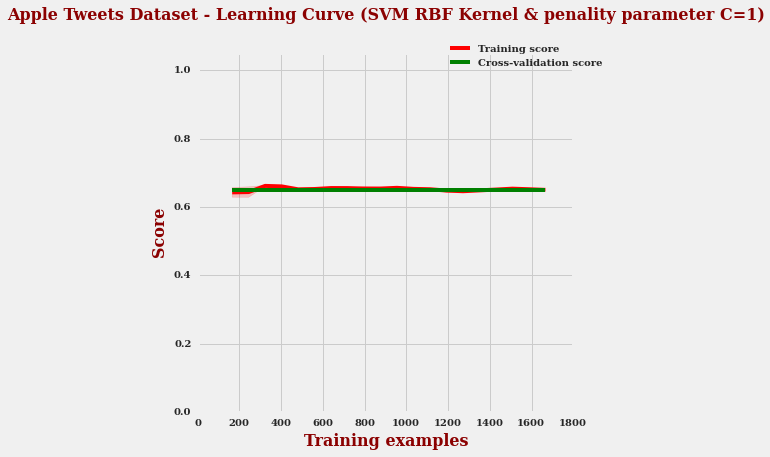

In [74]:
plot_learning_curve(model, "Learning Curve (SVM RBF Kernel & penality parameter C=1)", "a_svm_b_lca.png", ylim=(0,1.05))

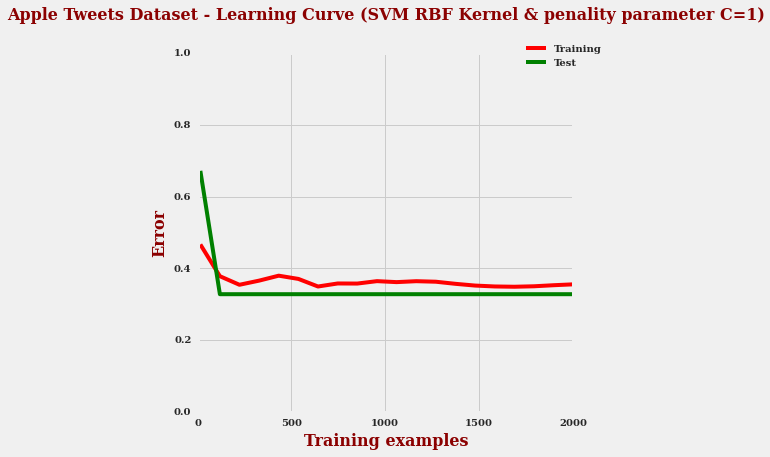

In [75]:
plot_learning_curve_ot(model, "Learning Curve (SVM RBF Kernel & penality parameter C=1)", "a_svm_b_lce.png")

#### SVM Model - Test Set Accuracy Before Tuning (RBF Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

Classification score using test set: 0.650769230769


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       227
          1       0.65      1.00      0.79       423

avg / total       0.42      0.65      0.51       650



/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


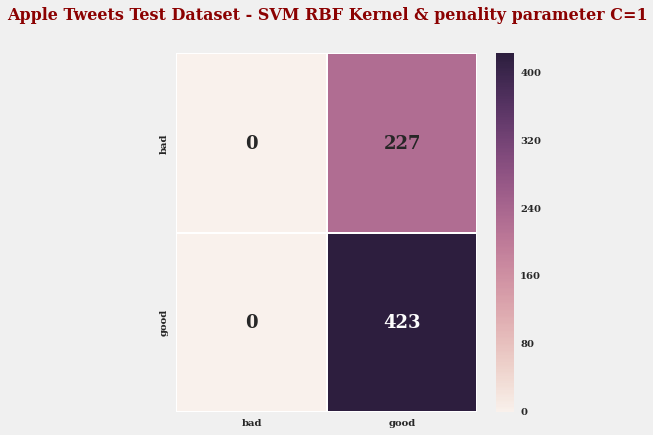

In [76]:
models_test(model, "SVM RBF Kernel & penality parameter C=1", "a_svm_b_cm_test.png") 

#### SVM Model Before Tuning (Poly Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

Classification score using train set: 0.6445

Classification score using test set: 0.672


Total running time for this model = 34.9923040867 seconds (0.0 minutes 34.9923040867 seconds)



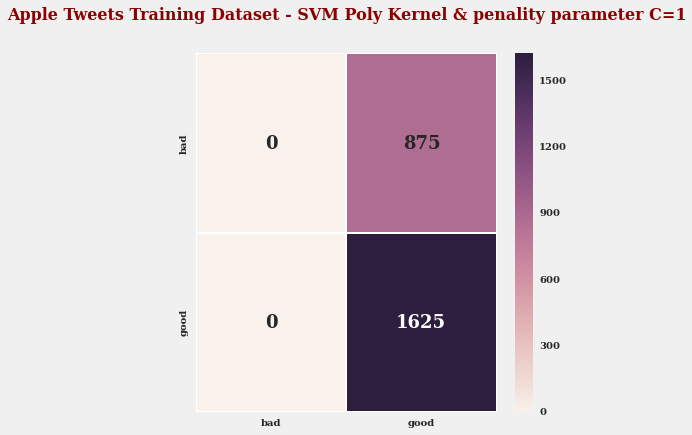

In [77]:
model = svm.SVC(probability=True, random_state=123)
models(model, "SVM Poly Kernel & penality parameter C=1", "a_svm_b2_cm_train.png")  

#### SVM Model - Train Set ROC/AUC Score Before Tuning (Poly Kernel & C=1.0)

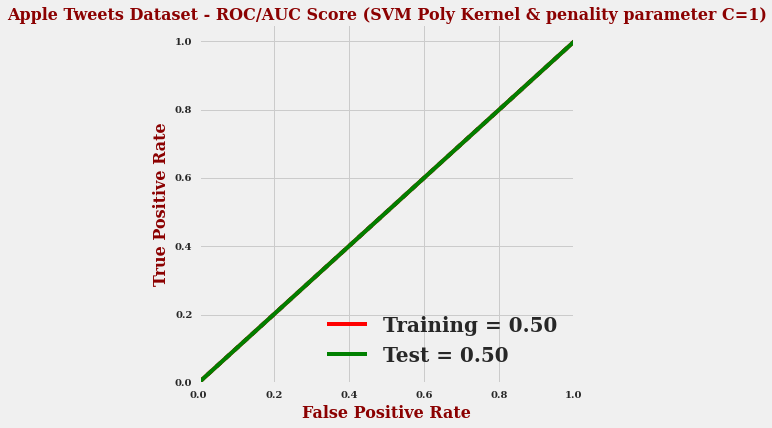

(0.5, 0.5)

In [78]:
plot_roc(model, "ROC/AUC Score (SVM Poly Kernel & penality parameter C=1)", "a_svm_b2_roc.png")

#### SVM Model - Learning Curve Before Tuning (Poly Kernel & C=1.0)

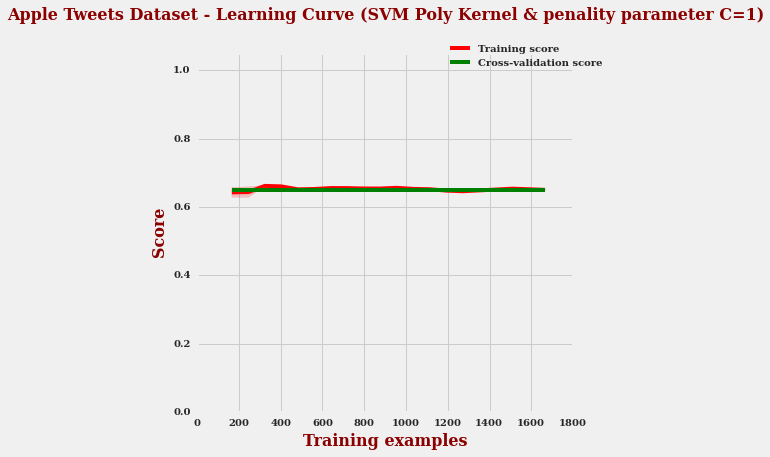

In [79]:
plot_learning_curve(model, "Learning Curve (SVM Poly Kernel & penality parameter C=1)", "a_svm_b2_lca.png", ylim=(0,1.05))

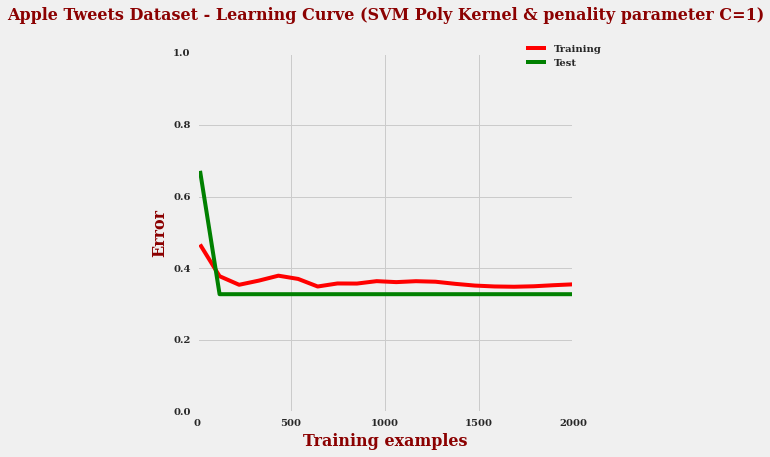

In [80]:
plot_learning_curve_ot(model, "Learning Curve (SVM Poly Kernel & penality parameter C=1)", "a_svm_b2_lce.png")

####SVM Model - Test Set Accuracy Before Tuning (Poly Kernel & C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

Classification score using test set: 0.650769230769


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       227
          1       0.65      1.00      0.79       423

avg / total       0.42      0.65      0.51       650



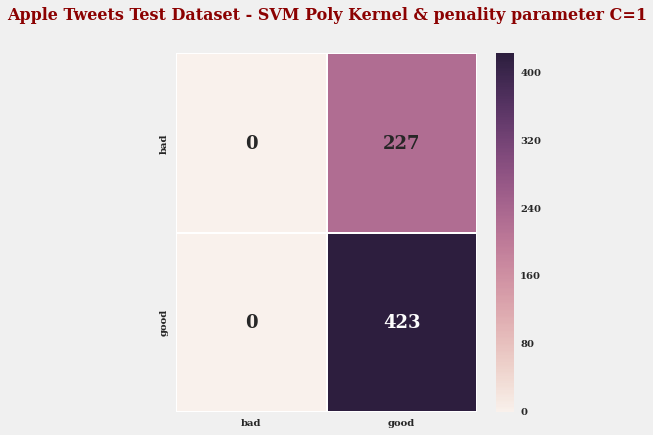

In [81]:
models_test(model, "SVM Poly Kernel & penality parameter C=1", "a_svm_b2_cm_test.png") 

#### SVM Model - Find Best Accuracy Score Tuning Parameters 

#### SVM Model - Grid Search using 5 fold cross validation to find best parameters

#### SVM Model After Tuning Parameters (Linear Kernel & penality parameter C=1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

Classification score using train set: 0.88

Classification score using test set: 0.794


Total running time for this model = 27.3220570087 seconds (0.0 minutes 27.3220570087 seconds)



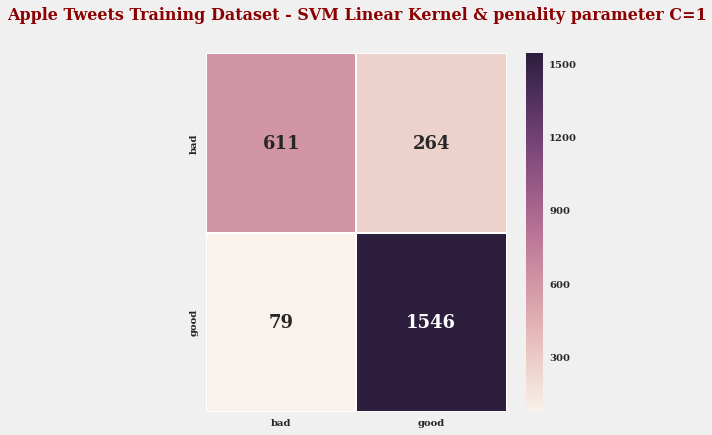

In [82]:
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)
models(model, "SVM Linear Kernel & penality parameter C=1", "a_svm_a_cm_train.png") 

#### SVM Model - Test Set ROC/AUC Score After Tuning Parameters

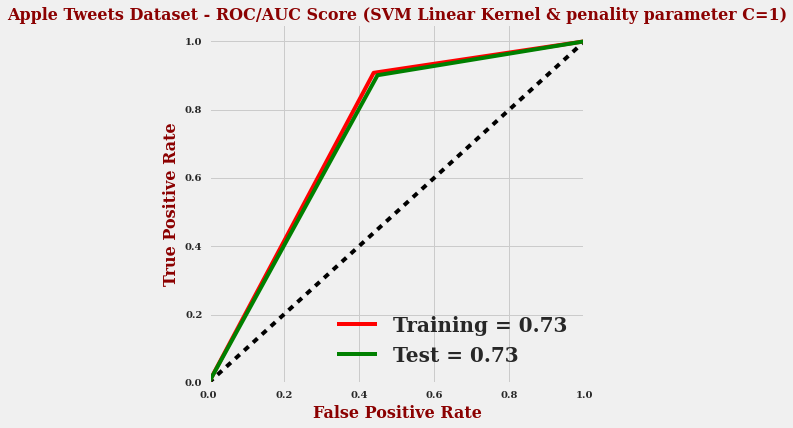

In [83]:
svm_roc, svm_roct = plot_roc(model, "ROC/AUC Score (SVM Linear Kernel & penality parameter C=1)", "a_svm_a_roc.png")

#### SVM Model - Learning Curve SVM Model After Tuning Parameters (Linear Kernel & penality parameter C=1)

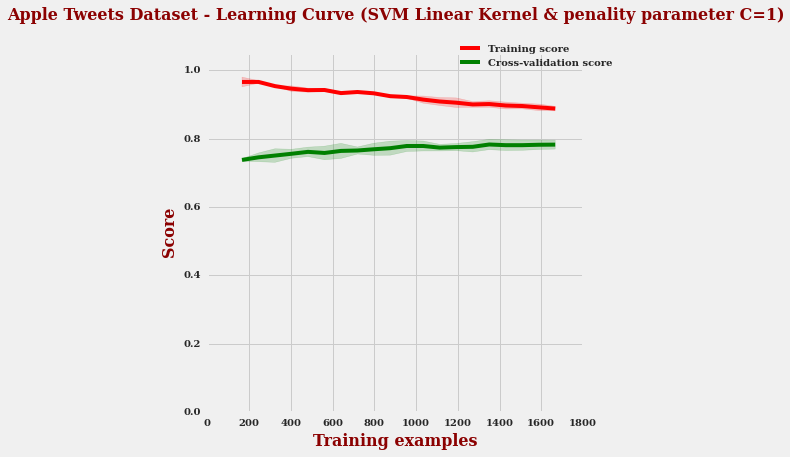

In [84]:
plot_learning_curve(model, "Learning Curve (SVM Linear Kernel & penality parameter C=1)", "a_svm_a_lca.png", ylim=(0,1.05))

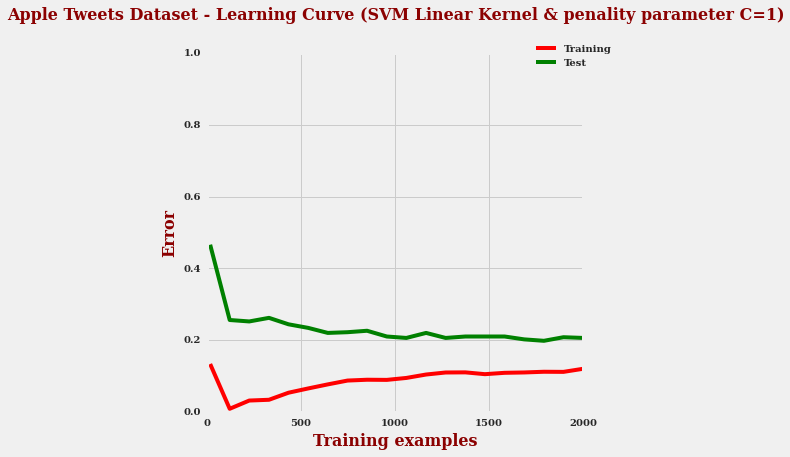

In [85]:
plot_learning_curve_ot(model, "Learning Curve (SVM Linear Kernel & penality parameter C=1)", "a_svm_a_lce.png")

#### SVM Model - Test Set Accuracy SVM Model After Tuning Parameters (Linear Kernel & penality parameter C=1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

Classification score using test set: 0.778461538462


             precision    recall  f1-score   support

          0       0.75      0.55      0.63       227
          1       0.79      0.90      0.84       423

avg / total       0.77      0.78      0.77       650



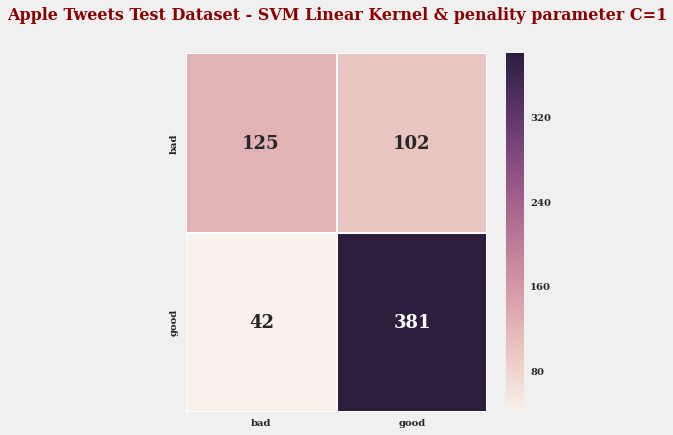

In [86]:
models_test(model, "SVM Linear Kernel & penality parameter C=1", "a_svm_a_cm_test.png")

#### Final SVM Model

In [87]:
svm_train_start = time.time()
model.fit(X,y)
svm_train_end = time.time()
svm_train_time = svm_train_end - svm_train_start
print "SVM Training time in seconds : %3f" % (svm_train_time)
print ""
svm_model = model 
print svm_model
print ""
preds = svm_model.predict(X_test)
#svm_validation_accuracy = np.where(preds==y_test, 1, 0).sum() / float(len(X_test))

scores = cross_validation.cross_val_score(model, X, y, cv=10)
svm_validation_accuracy = scores.mean()
print "SVM Validation Set Accuracy: %3f" % (svm_validation_accuracy)
print ""

scores = cross_validation.cross_val_score(model, X, y, cv=10, scoring='f1')
svm_validation_f1 = scores.mean()
print "SVM Validation Set f1: %3f" % (svm_validation_f1)
print ""

svm_predict_start = time.time()
preds = svm_model.predict(Xt)
svm_predict_end = time.time()
svm_predict_time = svm_predict_end-svm_predict_start
print "SVM Prediction time in seconds : %3f" % (svm_predict_time)
print ""

svm_test_accuracy = np.where(preds==yt, 1, 0).sum() / float(len(Xt))
print "SVM Test Set Accuracy: %3f" % (svm_test_accuracy)
print ""

svm_test_f1 = metrics.f1_score(yt, preds, average="micro")
print "SVM Test Set f1 Score: %3f" % (svm_test_f1)
print ""

SVM Training time in seconds : 13.663392

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

SVM Validation Set Accuracy: 0.789928

SVM Validation Set f1: 0.847497

SVM Prediction time in seconds : 0.611753

SVM Test Set Accuracy: 0.793846

SVM Test Set f1 Score: 0.853070



/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:931: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)


### Neural Net Model

#### Neural Network Model Design

- Back Propagation Algorithm
- Input layers has 547 units which is equal to the number of features in this dataset
- Feed Forward Network with two Hidden Layers; this is acyclic. Two hidden units help reducing the training time; increasing number of hidden units doesn't increase in accuracy but increase training time and over-fitting. Hidden layers provids flexibility to the NN model to discover new non-predefined features appropiate to the model. 
- Output Layer is Softmax; Softmax helps reducing the effect of outliers in the training set. Output layer has 2 units which is equal to the two target classess in the dataset. This model doesn't use 1-to-n output encoding.
- Learning Rate needs to be tuned; the final tuned value is 0.01. Learning Rate defines the step size of the search. If the learning rate is too low, the network will be too slow to converge and if the a learning rate is too high, it makes the weights and objective function diverge, so there is no learning at all.
- Momentum needs to be tuned; the final tuned value is 1e-8. Momentum helps reducing the training time and tuned Momentum helps reaching the global minimum without over-stepping and fast.
- Weight Decay is constant at 0.001. Weight Decay is introduced to keep the Weight values small (a penality term to avoid bias against outliers) and avoid over-fitting the training data.
- Number of Epochs; the final tuned value is 1000 Epochs. Too small number of Epochs doesn't help model to convergence and too large number of Epochs overfit the training data and drastically increases the training time. 

In [88]:
y = y.reshape(-1, 1)
yt = yt.reshape(-1, 1)

In [89]:
print X.shape
print y.shape
print Xt.shape
print yt.shape

(2500, 894)
(2500, 1)
(650, 894)
(650, 1)


In [90]:
def model_NN(NUM_EPOCHS, NUM_HIDDEN_UNITS, MOMENTUM, LEARNINGRATE, WEIGHTDECAY, TITLE, NAME):
    start = time.time()
    
    n_features = X.shape[1]
    n_classes = len(np.unique(y))
    
    # prepare train dataset
    input_size = X.shape[1]
    target_size = y.shape[1]
    
    ds = ClassificationDataSet(input_size, target_size, nb_classes=n_classes)
    for i in range(len(X)):
        ds.addSample(X[i],y[i])
    print "ds.indim", ds.indim
    print "ds.outim", ds.outdim
    print len(ds), len(ds['input']), len(ds['target'])
    
    tstdata, trndata = ds.splitWithProportion(0)
    print len(trndata), len(tstdata)
    tstdata = trndata
    trndata._convertToOneOfMany()
    tstdata._convertToOneOfMany()
    print "***"
    print trndata.indim, trndata.outdim, tstdata.indim, tstdata.outdim
  
    
    fnn = buildNetwork(n_features, NUM_HIDDEN_UNITS, n_classes, bias=True, 
                   outclass=SoftmaxLayer)
    print "fnn.indim", fnn.indim
    print "fnn.outdim", fnn.outdim
    print "Printing feed fwd network layers:\n"
    print fnn
    print "Printing feed fwd network parameter:\n"
    print fnn.params
    # train network
    print "Training network..."
    print ""
    trainer = BackpropTrainer(fnn, dataset=trndata, momentum=MOMENTUM, \
                              learningrate=LEARNINGRATE , verbose=False, weightdecay=WEIGHTDECAY) 

    nn_train_start = time.time()
    trnerr, valerr = trainer.trainUntilConvergence(maxEpochs=NUM_EPOCHS)
    nn_train_end = time.time()
    nn_train_time = nn_train_end - nn_train_start
    print "Neural Net Training time in seconds : %3f" % (nn_train_time)
    print ""
    plot_learning_curve_NN(trnerr,valerr, NUM_EPOCHS,TITLE, NAME)
    
    # predict using validation data
    print "Making predictions on Validation set..."
    print ""
    pv = fnn.activateOnDataset(tstdata)
    pv = pv.argmax(axis=1)
    nn_validation_accuracy = metrics.accuracy_score(tstdata['class'], pv, 
                                                     normalize=True)
    print "Accuracy on validation set: %7.4f" % metrics.accuracy_score(tstdata['class'], pv, 
                                                     normalize=True)
    print ""
    
    nn_validation_f1 = metrics.f1_score(tstdata['class'], pv, 
                                                     average="micro")
    print "f1 Score on validation set: %7.4f" % nn_validation_f1
    print ""
    vtpr, vpreds = tstdata['class'], pv
        
    # predict using test data
    print "Making predictions on Test set..."
    print ""
    
    # prepare test dataset
    input_size = Xt.shape[1]
    target_size = yt.shape[1]
    # you'll need labels. In case you don't have them...
    y_test_dummy = np.zeros(yt.shape)
    target_size = y_test_dummy.shape[1]
    ds = ClassificationDataSet(input_size, target_size)
    
    # predict
    #p = fnn.activateOnDataset(ds.argmax(axis=1))
    #p = p.argmax(axis=1)
   
    # predict using test data
    nn_predict_start = time.time()
    ypreds = []
    ytrues = []
    for i in range(Xt.shape[0]):
        pred = fnn.activate(Xt[i])
        ypreds.append(pred.argmax())
        ytrues.append(yt[i])
        
    nn_predict_end = time.time()
    nn_predict_time = nn_predict_end - nn_predict_start
    print "Neural Net Prediction time in seconds : %3f" % (nn_predict_time)
    print ""
    nn_test_accuracy = metrics.accuracy_score(ytrues, ypreds, 
                                                     normalize=True)
    print "Accuracy on test set: %7.4f" % metrics.accuracy_score(ytrues, ypreds, 
                                                     normalize=True)
    
    nn_test_f1 = metrics.f1_score(ytrues, ypreds, average="micro")
    print "f1 Score on test set: %7.4f" % nn_test_f1
    print ""
    
    fpr, tpr, _ = metrics.roc_curve(ytrues, ypreds)
    end = time.time()
    total = end-start
    minutes = total//60.0
    seconds = total%60.0
    print "Total running time for Back Propogation NN model = {} seconds ({} minutes {} seconds)".format(total, minutes, seconds)
    print ""
    return fpr, vtpr, vpreds, tpr, preds, nn_train_time, nn_predict_time, nn_validation_accuracy, nn_test_accuracy, nn_validation_f1, nn_test_f1, fnn

#### Deciding on Neural Network Learning Rate

- If the learning rate is too large, the search might run the risk of over-stepping the global minimum and might fail to converge. 
- If the learning rate is too small, the search might take a long time to reach the global minimum or  worse, it might convergence in a local minimum. 

Hence, it's important to find the right learning rate for the neural network model.

#### NN Model with Small Learning Rate

Low Learning rate too small(0.001), it lost in local minimum, never learns much and doesn't give a better accuracy.

#### NN Model with High Learning Rate

Learning Rate 1.0 doesn't give better accuracy on cross validation error since it over-steps on local minimum and fails to converge easily unlike the training error.

ds.indim 894
ds.outim 1
2500 2500 2500
2500 0
***
894 2 894 2
fnn.indim 894
fnn.outdim 2
Printing feed fwd network layers:

FeedForwardNetwork-8
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <SoftmaxLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-5': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-6': 'bias' -> 'out'>, <FullConnection 'FullConnection-7': 'bias' -> 'hidden0'>]

Printing feed fwd network parameter:

[-0.72735138 -0.76247371 -1.09197857 ...,  0.3959706  -0.00926399
 -0.29638369]
Training network...

Neural Net Training time in seconds : 249.786723



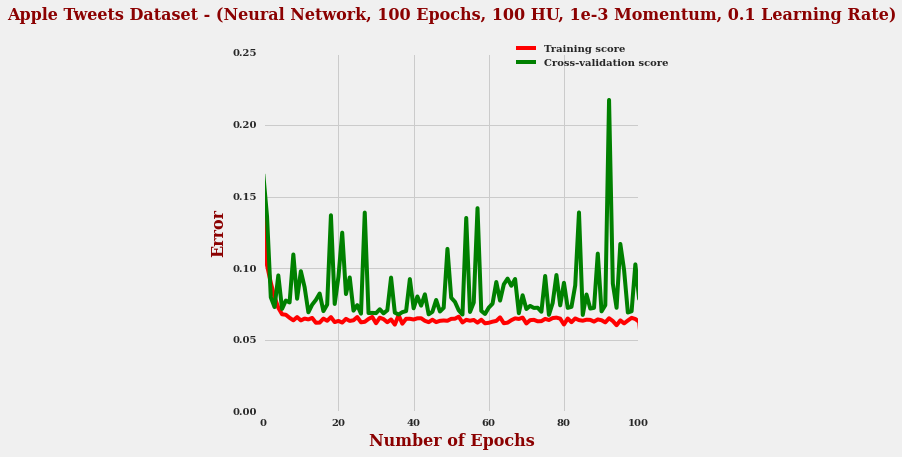

Making predictions on Validation set...

Accuracy on validation set:  0.8784

f1 Score on validation set:  0.9096

Making predictions on Test set...

Neural Net Prediction time in seconds : 0.065269

/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:931: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:931: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)




Accuracy on test set:  0.7831
f1 Score on test set:  0.8403

Total running time for Back Propogation NN model = 250.689216852 seconds (4.0 minutes 10.6892168522 seconds)



In [91]:
fpr, vtpr, vpreds, tpr, preds, nn_train_time, nn_predict_time, nn_validation_accuracy, nn_test_accuracy, nn_validation_f1, nn_test_f1, fnn  = model_NN(100, 100, 1e-3, 0.1, 0.001, "(Neural Network, 100 Epochs, 100 HU, 1e-3 Momentum, 0.1 Learning Rate)", "a_nn_b_lce.png")

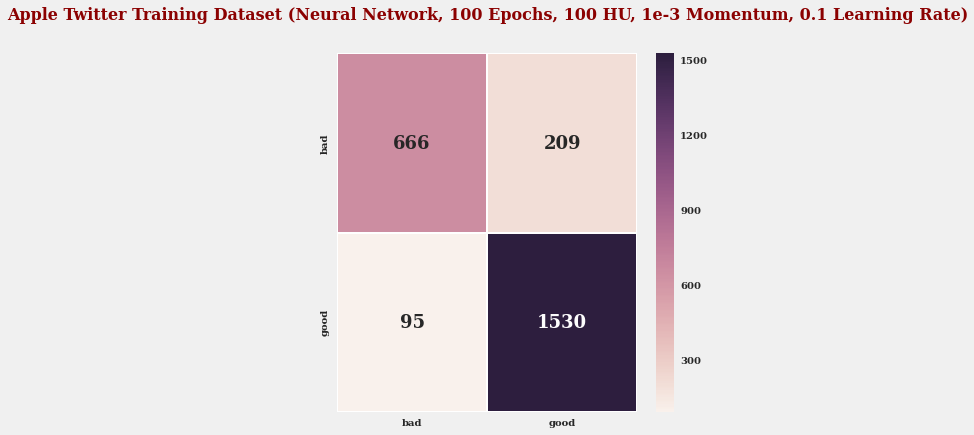

In [92]:
# print confusion matrix on validation 
cm = metrics.confusion_matrix(vtpr, vpreds)
target_names = ['bad', 'good']
fig, ax = plt.subplots()
sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
title = "Apple Twitter Training Dataset (Neural Network, 100 Epochs, 100 HU, 1e-3 Momentum, 0.1 Learning Rate)"
ax.set_title(title, y=1.08, fontdict=font)
fig.savefig("a_nn_b_cm_train.png", bbox_inches='tight')
fig.show()

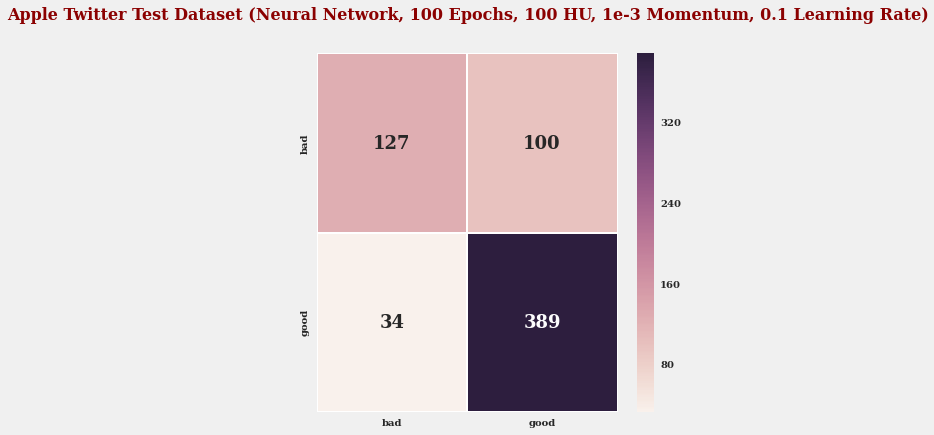

In [93]:
# print confusion matrix on test set
cm = metrics.confusion_matrix(yt, preds)
target_names = ['bad', 'good']
fig, ax = plt.subplots()
sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
title = "Apple Twitter Test Dataset (Neural Network, 100 Epochs, 100 HU, 1e-3 Momentum, 0.1 Learning Rate)"
ax.set_title(title, y=1.08, fontdict=font)
fig.savefig("a_nn_b_cm_test.png", bbox_inches='tight')
fig.show()

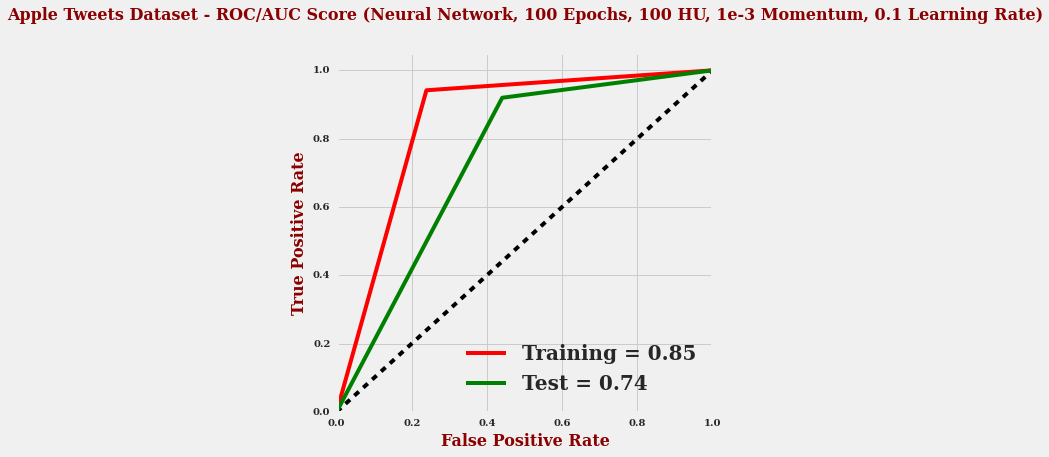

(0.85134065934065939, 0.7395465575238751)

In [94]:
plot_roc_NN(vtpr, vpreds, yt, preds, "ROC/AUC Score (Neural Network, 100 Epochs, 100 HU, 1e-3 Momentum, 0.1 Learning Rate)","a_nn_b_roc.png" )

#### NN Model with Appropiate Learning Rate

Learning Rate 0.1 gives better accuracy since the search converges at global minimum at a responsible time. 

#### Deciding on the NN Momentum

- If the momentum rate is too large, the search might run the risk of over-stepping the global minimum and might fail to converge. 
- If the momentum rate is too small, the searcht might convergence in a local minimum or would convergence would be slow where gradient is unchanging. 

Hence, it's important to find the right momentum for the neural network model.

#### NN Model with High Momentum

Momentum 1.0 doesn't give better accuracy on cross validation error since it over-steps on local minimum and fails to converge easily unlike the training error.

#### NN Model with Medium Momentum

Momentum of 0.01 gives better accuracy since it helps search convergence at global minimum.

#### NN Model with Small Momentum

Momentum 1e-8 is gives a better accuracy than 0.01 given the dataset doesn't have many unchanging gradients and also does not increase the training time (given there are only 2 hidden units).

#### NN Model with more Hidden Units (from 100 to 60) decreases accuracy

#### Final NN Model with Tuned Parameters

ds.indim 894
ds.outim 1
2500 2500 2500
2500 0
***
894 2 894 2
fnn.indim 894
fnn.outdim 2
Printing feed fwd network layers:

FeedForwardNetwork-17
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <SoftmaxLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-13': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-14': 'bias' -> 'out'>, <FullConnection 'FullConnection-15': 'bias' -> 'hidden0'>, <FullConnection 'FullConnection-16': 'hidden0' -> 'out'>]

Printing feed fwd network parameter:

[ 0.88804083  0.0064398   0.59182446 ...,  0.77332447 -0.65203793
  0.38534351]
Training network...

Neural Net Training time in seconds : 1483.303804



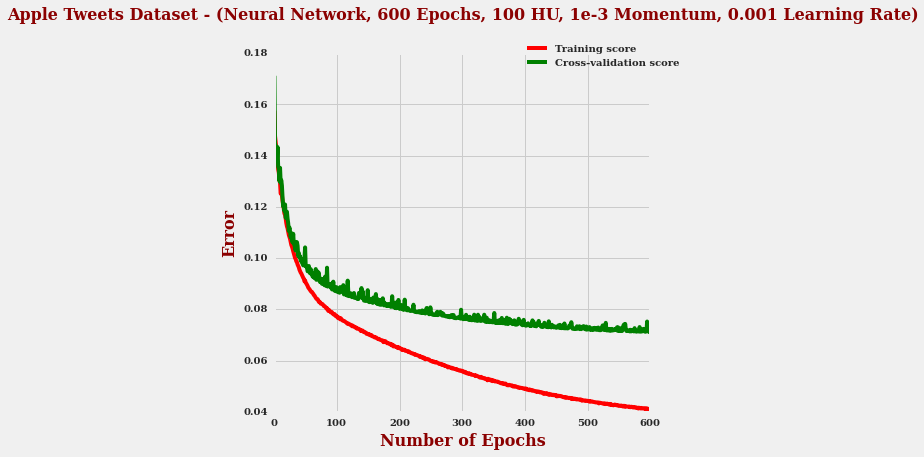

Making predictions on Validation set...

Accuracy on validation set:  0.8660

f1 Score on validation set:  0.9006

Making predictions on Test set...

Neural Net Prediction time in seconds : 0.069392

/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:931: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/metrics/classification.py:931: DeprecationWarning: From version 0.18, binary input will not be handled specially when using averaged precision/recall/F-score. Please use average='binary' to report only the positive class performance.
  'positive class performance.', DeprecationWarning)




Accuracy on test set:  0.7938
f1 Score on test set:  0.8514

Total running time for Back Propogation NN model = 1484.26289296 seconds (24.0 minutes 44.2628929615 seconds)



In [95]:
fpr, vtpr, vpreds, tpr, preds, nn_train_time, nn_predict_time, nn_validation_accuracy, nn_test_accuracy, nn_validation_f1, nn_test_f1, fnn  = model_NN(600, 100, 1e-3, 0.001, 0.001, "(Neural Network, 600 Epochs, 100 HU, 1e-3 Momentum, 0.001 Learning Rate)", "a_nn_a_lce.png")

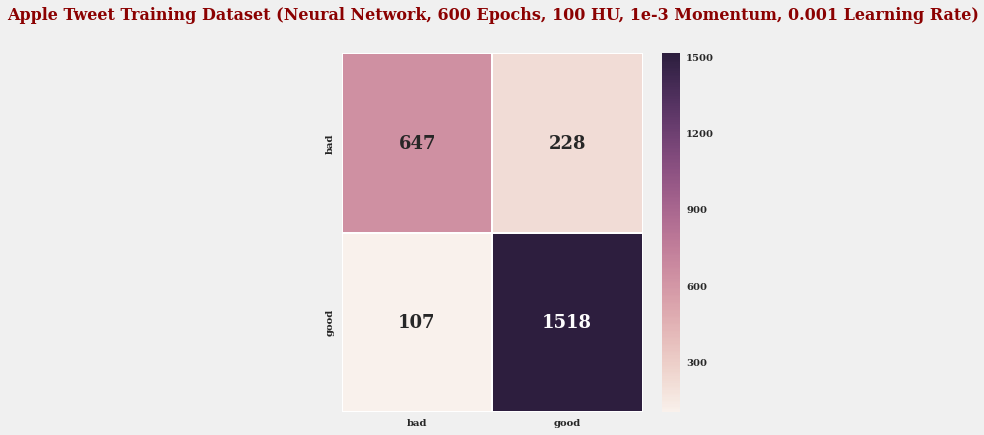

In [96]:
# print confusion matrix on validation 
cm = metrics.confusion_matrix(vtpr, vpreds)
target_names = ['bad', 'good']
fig, ax = plt.subplots()
sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
title = "Apple Tweet Training Dataset (Neural Network, 600 Epochs, 100 HU, 1e-3 Momentum, 0.001 Learning Rate)"
ax.set_title(title, y=1.08, fontdict=font)
fig.savefig("a_nn_a_cm_train.png", bbox_inches='tight')
fig.show()

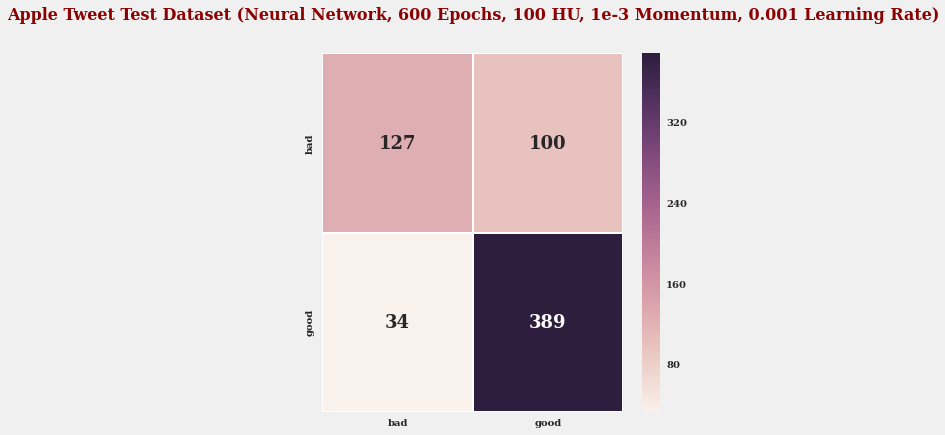

In [97]:
# print confusion matrix
cm = metrics.confusion_matrix(yt, preds)
target_names = ['bad', 'good']
fig, ax = plt.subplots()
sns_cm = sns.heatmap(cm, annot=True, fmt='', xticklabels=target_names, yticklabels=target_names , ax=ax)
title = "Apple Tweet Test Dataset (Neural Network, 600 Epochs, 100 HU, 1e-3 Momentum, 0.001 Learning Rate)"
ax.set_title(title, y=1.08, fontdict=font)
fig.savefig("a_nn_a_cm_test.png", bbox_inches='tight')
fig.show()

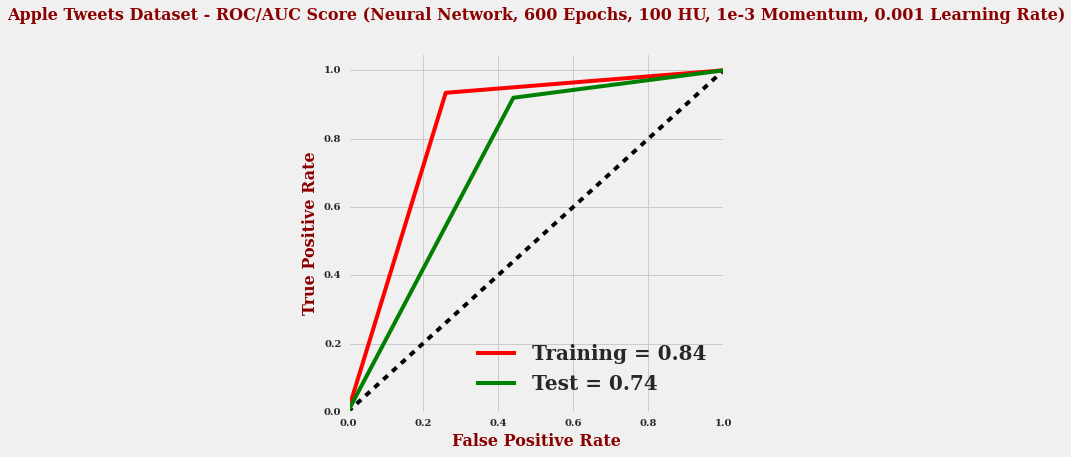

In [98]:
nn_roc, nn_roct = plot_roc_NN(vtpr, vpreds, yt, preds, "ROC/AUC Score (Neural Network, 600 Epochs, 100 HU, 1e-3 Momentum, 0.001 Learning Rate)","a_nn_a_roc.png" )

### Summary - Comparision of Different Algorithms

#### Comparision of Accuracy Score for Different Classifiers

In [99]:
df_data = [{'Model' : 'Decision Tree', 'Test_Accuracy': dt_test_accuracy, 'Training_Accuracy':dt_validation_accuracy},
           {'Model' : 'KNN', 'Test_Accuracy': knn_test_accuracy, 'Training_Accuracy':knn_validation_accuracy},
           {'Model' : 'AdaBoost', 'Test_Accuracy': ada_test_accuracy, 'Training_Accuracy':ada_validation_accuracy},
           {'Model' : 'SVM', 'Test_Accuracy': svm_test_accuracy, 'Training_Accuracy':svm_validation_accuracy},
           {'Model' : 'Neural Net', 'Test_Accuracy': nn_test_accuracy, 'Training_Accuracy':nn_validation_accuracy},
          ]
df_scores = pd.DataFrame(df_data)
df_scores = df_scores.sort('Test_Accuracy')
df_scores.head()

Model  Test_Accuracy  Training_Accuracy
1            KNN       0.703077           0.682803
0  Decision Tree       0.736923           0.739604
2       AdaBoost       0.763077           0.785963
3            SVM       0.793846           0.789928
4     Neural Net       0.793846           0.866000

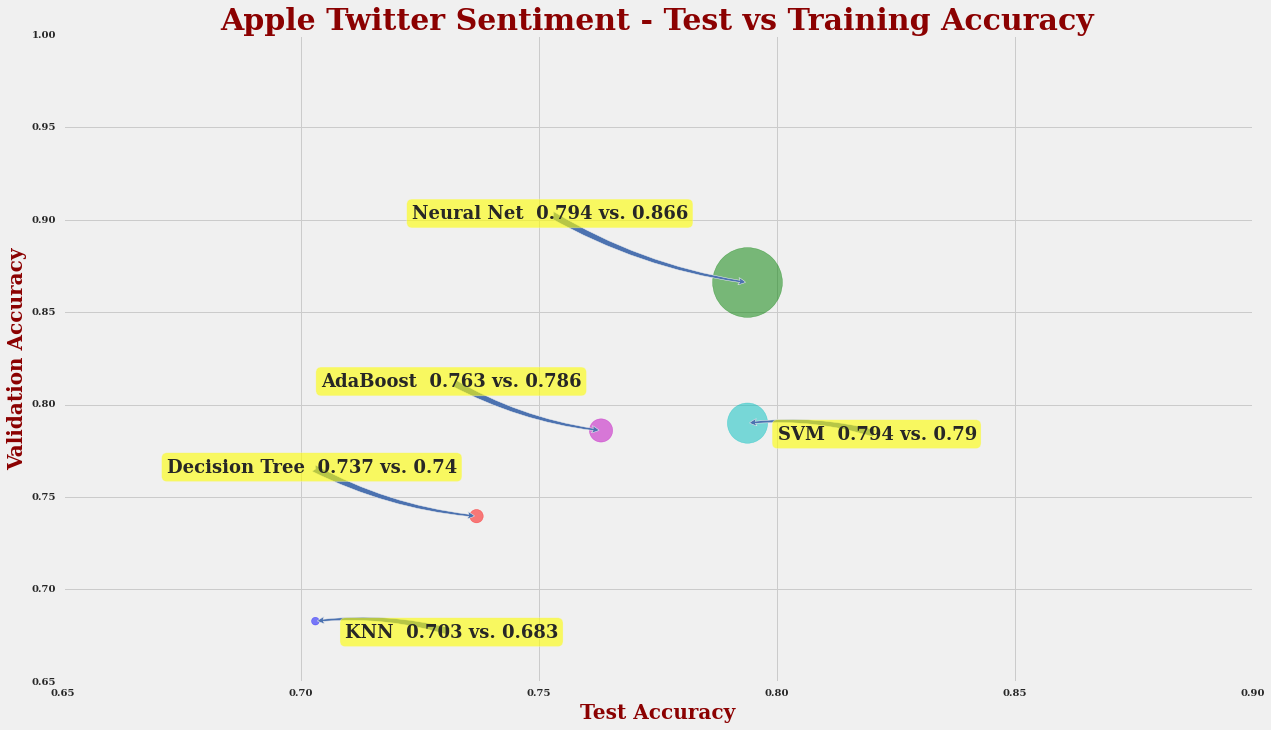

In [100]:
a = df_scores.Test_Accuracy.values
b = df_scores.Training_Accuracy.values
z = df_scores.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*3**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Test Accuracy', fontsize=20, fontdict=font)
ax.set_ylabel(r'Validation Accuracy', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Test vs Training Accuracy',  fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate(z[i], (a[i],b[i]))
    if z[i] == 'Neural Net': 
        ha = "right"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree' or z[i] == 'AdaBoost':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)), 
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    

fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
fig.savefig("ats_classifiers_performance.png", bbox_inches='tight')
fig.show()

#### Comparision of f1 Score for Different Classifiers

In [101]:
df_f1_data = [{'Model' : 'Decision Tree', 'Test_f1': dt_test_f1, 'Training_f1':dt_validation_f1},
           {'Model' : 'KNN', 'Test_f1': knn_test_f1, 'Training_f1':knn_validation_f1},
           {'Model' : 'AdaBoost', 'Test_f1': ada_test_f1, 'Training_f1':ada_validation_f1},
           {'Model' : 'SVM', 'Test_f1': svm_test_f1, 'Training_f1':svm_validation_f1},
           {'Model' : 'Neural Net', 'Test_f1': nn_test_f1, 'Training_f1':nn_validation_f1},
          ]
df_f1_scores = pd.DataFrame(df_f1_data)
df_f1_scores = df_f1_scores.sort('Test_f1')
df_f1_scores.head()

Model   Test_f1  Training_f1
1            KNN  0.795334     0.782052
0  Decision Tree  0.816720     0.818588
2       AdaBoost  0.833333     0.850604
4     Neural Net  0.851441     0.900623
3            SVM  0.853070     0.847497

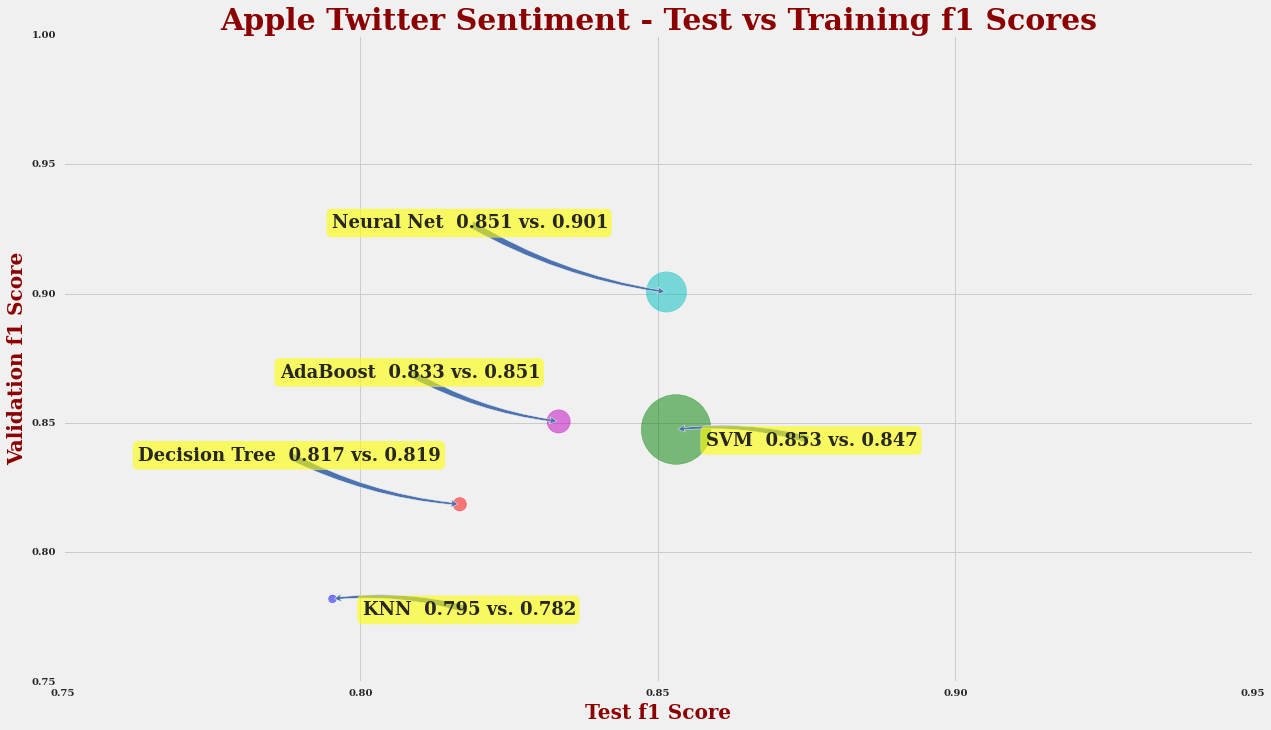

In [102]:
a = df_f1_scores.Test_f1.values
b = df_f1_scores.Training_f1.values
z = df_f1_scores.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*3**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Test f1 Score', fontsize=20, fontdict=font)
ax.set_ylabel(r'Validation f1 Score', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Test vs Training f1 Scores',  fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate(z[i], (a[i],b[i]))
    if z[i] == 'Neural Net': 
        ha = "right"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree' or z[i] == 'AdaBoost':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)), 
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    

fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
fig.savefig("ats_f1_performance.png", bbox_inches='tight')
fig.show()

In [103]:
df_time_data = [{'Model' : 'Decision Tree', 'Training_Time': dt_train_time, 'Prediction_Time':dt_predict_time},
           {'Model' : 'KNN', 'Training_Time': knn_train_time, 'Prediction_Time':knn_predict_time},
           {'Model' : 'AdaBoost', 'Training_Time': ada_train_time, 'Prediction_Time':ada_predict_time},
           {'Model' : 'SVM', 'Training_Time': svm_train_time, 'Prediction_Time':svm_predict_time},
           {'Model' : 'Neural Net', 'Training_Time': nn_train_time, 'Prediction_Time':nn_predict_time},
          ]
df_times = pd.DataFrame(df_time_data)
df_times = df_times.sort('Training_Time')
df_times.head()

Model  Prediction_Time  Training_Time
0  Decision Tree         0.000949       0.026684
1            KNN         1.294934       0.076673
2       AdaBoost         0.024593       9.230035
3            SVM         0.611753      13.663392
4     Neural Net         0.069392    1483.303804

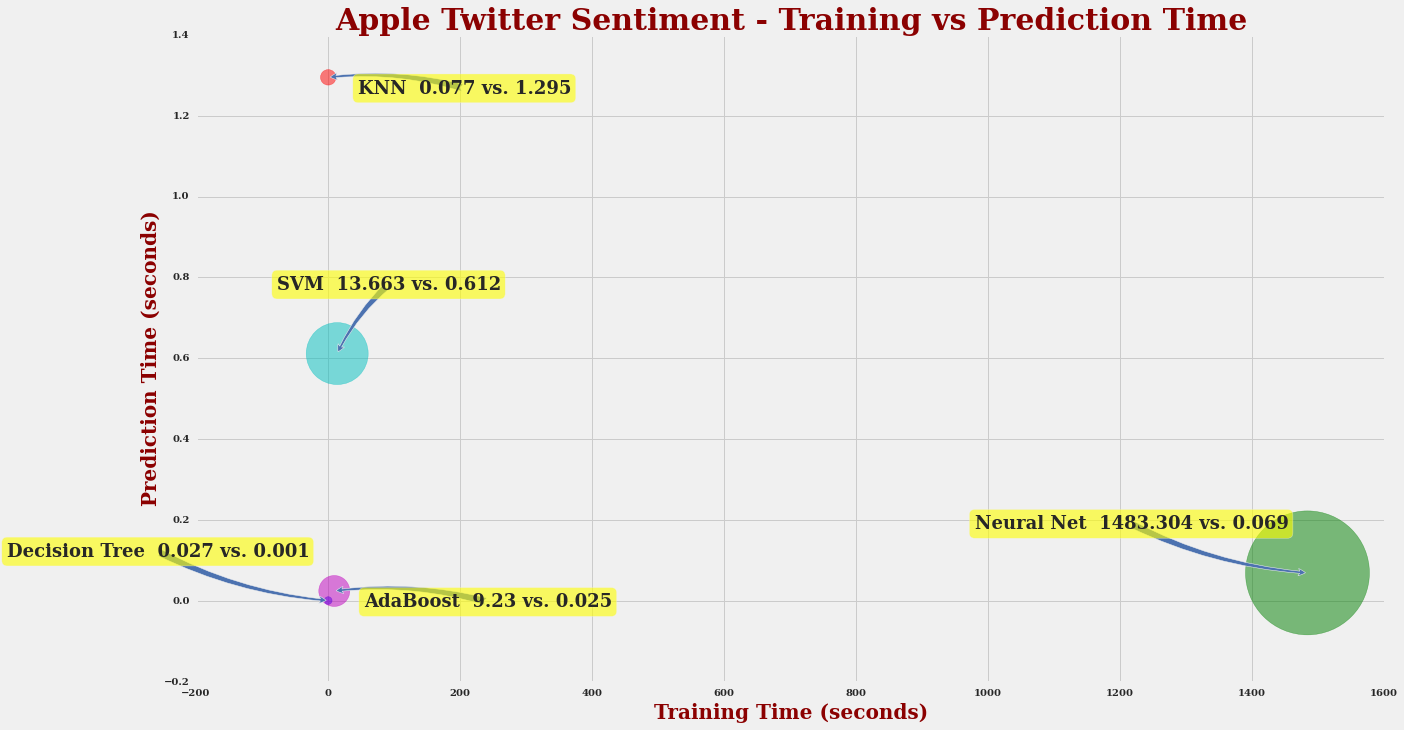

In [104]:
a = df_times.Training_Time.values
b = df_times.Prediction_Time.values
z = df_times.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*4**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Training Time (seconds)', fontsize=20, fontdict=font)
ax.set_ylabel(r'Prediction Time (seconds)', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Training vs Prediction Time', fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate((z[i], a[i],b[i],
    #         arrowprops=dict(arrowstyle="->"))
    if z[i] == 'SVM': 
        ha = "left"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree' or z[i] == 'Neural Net':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)), 
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    
fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
fig.savefig("ats_classifiers_time.png", bbox_inches='tight')
fig.show()

In [105]:
df_roc_data = [{'Model' : 'Decision Tree', 'Test_ROC': dt_roct, 'Training_ROC':dt_roc},
           {'Model' : 'KNN', 'Test_ROC': knn_roct, 'Training_ROC':knn_roc},
           {'Model' : 'AdaBoost', 'Test_ROC': ada_roct, 'Training_ROC':ada_roc},
           {'Model' : 'SVM', 'Test_ROC': svm_roct, 'Training_ROC':svm_roc},
           {'Model' : 'Neural Net', 'Test_ROC': nn_roct, 'Training_ROC':nn_roc}
          ]
df_rocs = pd.DataFrame(df_roc_data)
df_rocs = df_rocs.sort('Test_ROC')
df_rocs.head()

Model  Test_ROC  Training_ROC
1            KNN  0.599811      0.603404
0  Decision Tree  0.680127      0.691529
2       AdaBoost  0.704789      0.706482
3            SVM  0.725685      0.734357
4     Neural Net  0.739547      0.836791

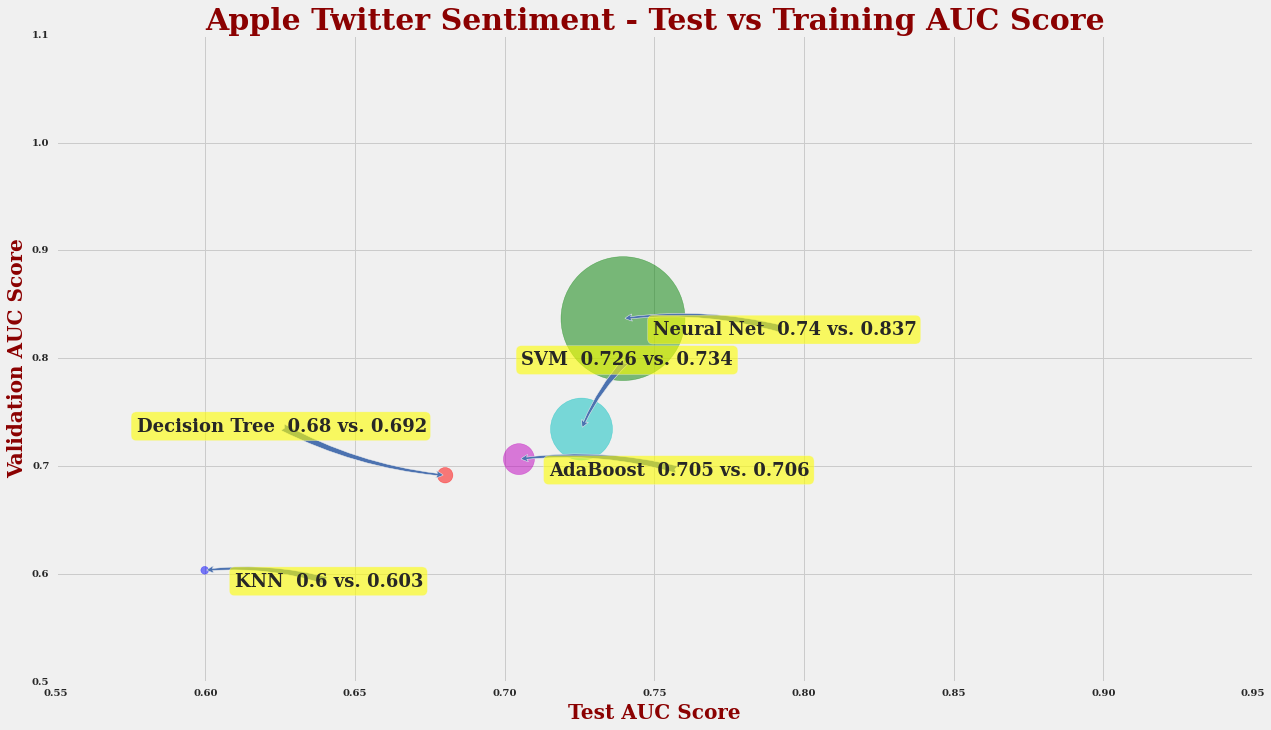

In [106]:
a = df_rocs.Test_ROC.values
b = df_rocs.Training_ROC.values
z = df_rocs.Model.values
c = ["b", "r", "m", "c", "g"]
s = [60*4**n for n in range(len(a))]

fig, ax = plt.subplots()

ax.scatter(a,b,c=c,s=s, edgecolor=c, alpha=0.5)
ax.set_xlabel(r'Test AUC Score', fontsize=20, fontdict=font)
ax.set_ylabel(r'Validation AUC Score', fontsize=20, fontdict=font)
ax.set_title('Apple Twitter Sentiment - Test vs Training AUC Score', fontsize=30, fontdict=font)
ax.grid(True)

for i, txt in enumerate(a):
    #ax.annotate((z[i], a[i],b[i],
    #         arrowprops=dict(arrowstyle="->"))
    if z[i] == 'SVM': 
        ha = "left"
        xytext = (-60,60)
    elif z[i] == 'Decision Tree':
        ha = "right"
        xytext = (-20,40)
    else:
        ha = "left"
        xytext = (30,-20)
    
    ax.annotate(
        z[i] + "  " + str(round(a[i],3)) + " vs. " + str(round(b[i],3)),
        xy = (a[i],b[i],), xytext = xytext,
        textcoords = 'offset points' , ha = ha, va = "bottom",
        bbox = dict(boxstyle = 'round,pad=0.3', fc = 'yellow', alpha = 0.6),
        arrowprops = dict(arrowstyle = "fancy", connectionstyle = 'arc3,rad=0.1'))
    
fig.set_size_inches(18.0, 10.5)
fig.tight_layout()
fig.savefig("ats_auc_scores.png", bbox_inches='tight')
fig.show()